# Western Australia Rental Prices - Predict

https://www.kaggle.com/c/deloitte-western-australia-rental-prices/

In [1]:
# imports
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division
from sklearn import preprocessing
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# constants
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
sample_submission = pd.read_csv('data/sample_submission.csv')

In [4]:
def compare_plot(best, current):
    best = list(best)
    current = list(current)
    m, b = np.polyfit(best,current, 1)
    x = np.arange(min(best),max(best))
    plt.scatter(best, current, marker='.', s=1)
    plt.plot(x, m*x + b, 'r-', label='%.4f'%m)
    plt.suptitle('Comparing Predictions')
    plt.xlabel('Best Prediction')
    plt.ylabel('New Prediction')
    plt.legend()
    print m, b
    plt.show()
    return

# Predict

In [4]:
predict1 = pd.read_csv('south_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(11)_100_Informative_Features_test_big.csv.csv')
predict1[:5]

,RowId,Prediction
0,1,144.476608
1,2,111.332870
2,3,127.702179
3,4,118.451378
4,5,122.685890


In [5]:
submit1 = sample_submission.copy()
submit1.REN_BASE_RENT = predict1.Prediction
submit1[:5]

,REN_ID,REN_BASE_RENT
0,10568,144.476608
1,12686,111.332870
2,122383,127.702179
3,147691,118.451378
4,152161,122.685890


In [6]:
sub1 = submit1.describe()
sub1

,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,424.585949
std,1526951.230241,157.806933
min,30.000000,86.916962
25%,1315572.500000,324.580620
50%,2638793.000000,397.231918
75%,3964925.250000,482.893738
max,5280763.000000,2361.020020


In [7]:
# submit1.to_csv('submit1.csv', index=False)

# 0.49111 ! Blah

In [8]:
predict2 = pd.read_csv('south2_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(21)_100_Informative_Features_test2.csv.csv')
submit2 = sample_submission.copy()
submit2.REN_BASE_RENT = predict2.Prediction
submit2[:5]

,REN_ID,REN_BASE_RENT
0,10568,212.419113
1,12686,212.836548
2,122383,255.483734
3,147691,256.980286
4,152161,225.435379


In [9]:
sub2 = submit2.describe()
sub2

,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,443.147150
std,1526951.230241,168.412303
min,30.000000,105.610481
25%,1315572.500000,342.940987
50%,2638793.000000,409.262161
75%,3964925.250000,496.776520
max,5280763.000000,3234.558594


In [10]:
# submit2.to_csv('submit2.csv', index=False)

# 0.48683 Still overfitting !

In [11]:
predict3 = pd.read_csv('south2_Auto-tuned_Stochastic_Gradient_Descent_Regression_(16)_100_Informative_Features_test2.csv.csv')
submit3 = sample_submission.copy()
submit3.REN_BASE_RENT = predict3.Prediction
submit3[:5]

,REN_ID,REN_BASE_RENT
0,10568,381.487001
1,12686,381.487001
2,122383,381.487001
3,147691,381.487001
4,152161,381.487001


In [12]:
submit3.REN_BASE_RENT.unique()

array([ 381.48700146])

In [13]:
sub3 = submit3.describe()
sub3 

,REN_ID,REN_BASE_RENT
count,150508.000000,1.505080e+05
mean,2640827.444495,3.814870e+02
std,1526951.230241,2.273744e-13
min,30.000000,3.814870e+02
25%,1315572.500000,3.814870e+02
50%,2638793.000000,3.814870e+02
75%,3964925.250000,3.814870e+02
max,5280763.000000,3.814870e+02


In [14]:
# I'm not submitting that ! Ok, well, let's see what it does ...
# submit3.to_csv('submit3.csv', index=False)

# Submit3 0.41088 - Crap!

In [15]:
pfile = 'subsouth_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(23)_100_Informative_Features_subtest.csv.csv'
predict4 = pd.read_csv(pfile)
submit4 = sample_submission.copy()
submit4.REN_BASE_RENT = predict4.Prediction
submit4[:5]

,REN_ID,REN_BASE_RENT
0,10568,247.755005
1,12686,284.268677
2,122383,284.253571
3,147691,292.820526
4,152161,250.021469


In [16]:
sub4 = submit4.describe()
sub4

,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,429.453848
std,1526951.230241,156.879688
min,30.000000,65.887016
25%,1315572.500000,339.567963
50%,2638793.000000,402.088455
75%,3964925.250000,480.113121
max,5280763.000000,3073.915039


In [17]:
# submit4.to_csv('submit4.csv', index=False)

# Submit4 0.49078  Worse! 

In [18]:
pfile = 'subsouth_Linear_Regression_(5)_100_Informative_Features_subtest.csv.csv'
predict5 = pd.read_csv(pfile)
submit5 = sample_submission.copy()
submit5.REN_BASE_RENT = predict5.Prediction
submit5[:5]

,REN_ID,REN_BASE_RENT
0,10568,360.828273
1,12686,251.550346
2,122383,282.724266
3,147691,279.434571
4,152161,228.904616


In [19]:
sub5 = submit5.describe()
sub5

,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,492.288953
std,1526951.230241,180.474946
min,30.000000,-10311.259888
25%,1315572.500000,386.307730
50%,2638793.000000,467.664707
75%,3964925.250000,560.205469
max,5280763.000000,14567.522027


In [20]:
# do the REN_ID's match? Yes
(~(sample_submission.REN_ID == submit5.REN_ID)).sum()

0

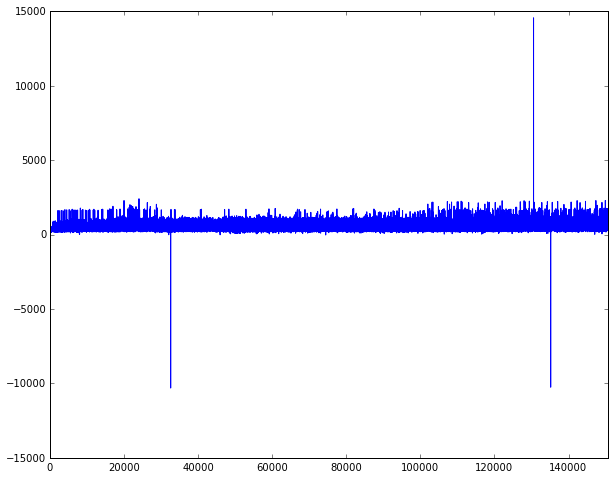

In [21]:
submit5.REN_BASE_RENT.plot()

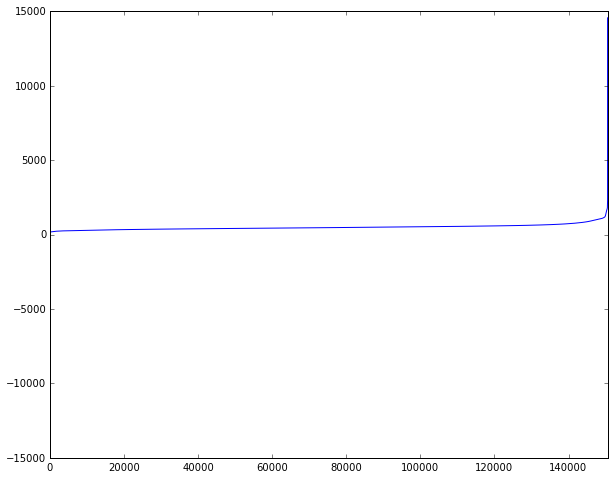

In [22]:
submit5.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

In [23]:
submit5[submit5.REN_BASE_RENT > 10000]

,REN_ID,REN_BASE_RENT
130533,941937,14567.522027


In [24]:
sub5.REN_BASE_RENT['mean']

492.28895270549862

In [25]:
submit5[submit5.REN_BASE_RENT > 10000] = sub5.REN_BASE_RENT['mean']
submit5[submit5.REN_BASE_RENT < 0] = sub5.REN_BASE_RENT['mean']

In [26]:
sub5 = submit5.describe()
sub5

,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640785.591023,492.348772
std,1526993.205109,172.356681
min,30.000000,17.076604
25%,1315515.250000,386.319539
50%,2638729.000000,467.669453
75%,3964925.250000,560.204631
max,5280763.000000,2409.274105


In [27]:
# submit5.to_csv('submit5.csv', index=False)

 I made the neagtives positive and changed a REN_BASE_RENT of 14567.xxx to 1456.7xxx
### Submit5 is worse 0.49674

In [28]:
submit6 = sample_submission.copy()
submit6.REN_BASE_RENT = 400
submit6[:5]

,REN_ID,REN_BASE_RENT
0,10568,400
1,12686,400
2,122383,400
3,147691,400
4,152161,400


In [29]:
sub6 = submit6.describe()
sub6

,REN_ID,REN_BASE_RENT
count,150508.000000,150508
mean,2640827.444495,400
std,1526951.230241,0
min,30.000000,400
25%,1315572.500000,400
50%,2638793.000000,400
75%,3964925.250000,400
max,5280763.000000,400


In [30]:
# submit6.to_csv('submit6.csv', index=False)

### Submit6 Better ! 0.39961

In [31]:
pfile = 'sub2south_AVG_Blender_(13+20+22)_(60)_100_Informative_Features_sub2test.csv.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit7 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,233.568473
1,12686,148.337186
2,122383,182.093852
3,147691,182.882608
4,152161,165.394325


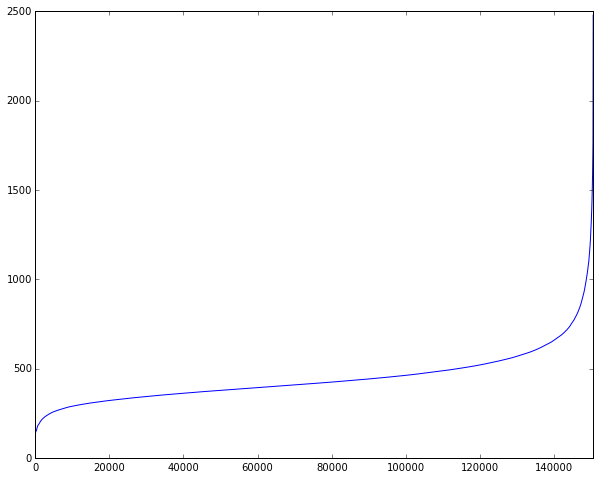

In [32]:
submit7.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

In [33]:
sub7 = submit7.describe()
sub7

,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,446.150829
std,1526951.230241,154.085791
min,30.000000,72.073701
25%,1315572.500000,357.494054
50%,2638793.000000,416.378337
75%,3964925.250000,495.917464
max,5280763.000000,2479.071302


/Users/paulperry/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


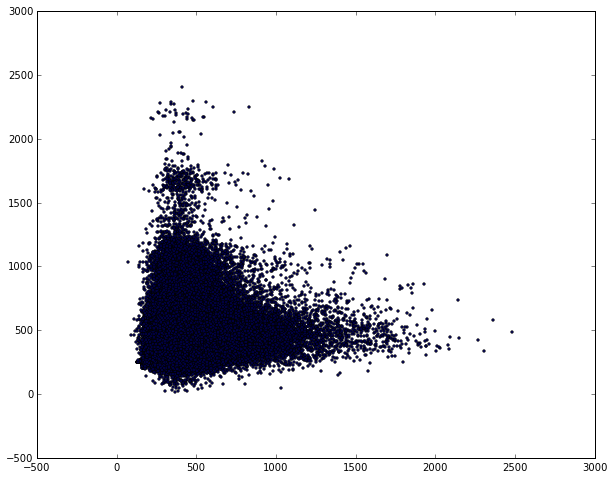

In [34]:
plt.scatter(list(submit7.REN_BASE_RENT), list(submit5.REN_BASE_RENT), marker='.')

In [35]:
submit7.to_csv('submit7.csv', index=False)

# Submit7: 0.25917 Finally a clean model ! 
- V  0.1673 
- CV 0.1695 
- HO 0.1763
- PLB = private LeaderBoard, KLB = Kaggle LeaderBoard

In [36]:
pfile = 'sub2south_Gradient_Boosted_Trees_Regressor_with_Early_Stoppi_(20)_100_Informative_Features_sub2test.csv.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit8 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,258.702865
1,12686,164.420189
2,122383,208.480983
3,147691,209.316903
4,152161,188.479005


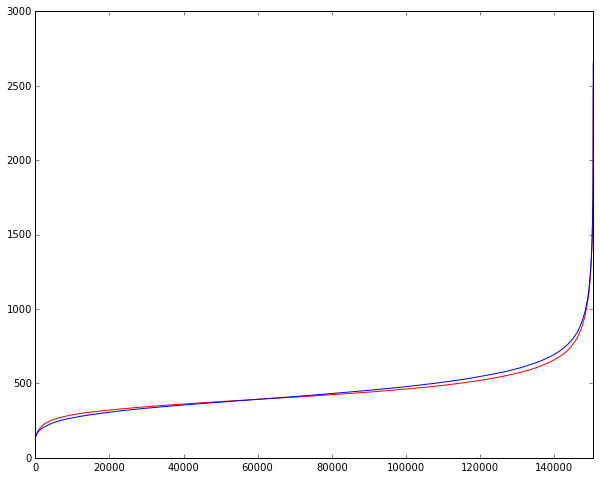

In [37]:
submit7.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit8.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

In [38]:
sub8 = submit8.describe()
sub8

,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,453.340303
std,1526951.230241,168.542349
min,30.000000,52.287244
25%,1315572.500000,349.969332
50%,2638793.000000,422.382271
75%,3964925.250000,517.947937
max,5280763.000000,2656.851807


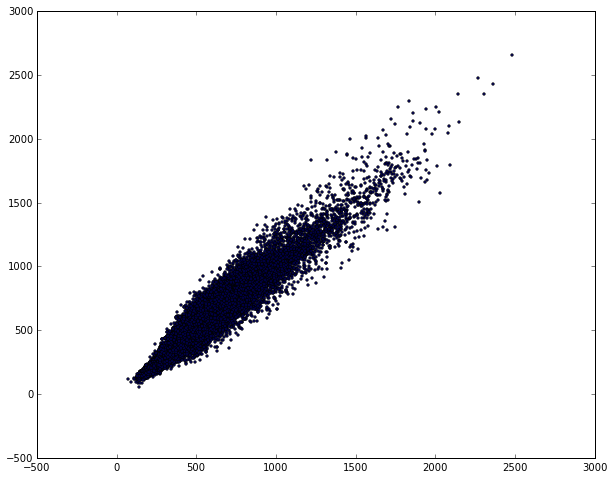

In [39]:
plt.scatter(list(submit7.REN_BASE_RENT), list(submit8.REN_BASE_RENT), marker='.')

In [40]:
submit8.to_csv('submit8.csv', index=False)

# Submit8 0.30024
- V  0.1685 
- CV 0.1717 
- HO 0.1787

In [41]:
pfile = 'sub2south_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(22)_100_Informative_Features_sub2test.csv.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit9 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,239.597794
1,12686,140.206238
2,122383,170.237366
3,147691,165.786087
4,152161,157.804916


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,446.905239
std,1526951.230241,156.587686
min,30.000000,72.648338
25%,1315572.500000,357.805374
50%,2638793.000000,415.433319
75%,3964925.250000,495.229614
max,5280763.000000,2874.989014


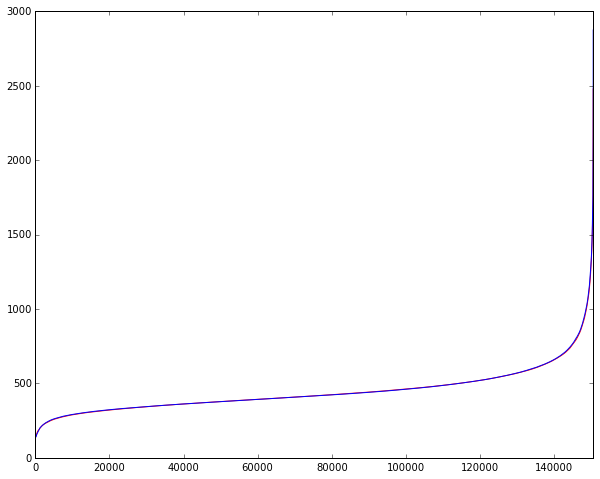

In [42]:
submit7.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit9.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)
sub9 = submit9.describe()
sub9

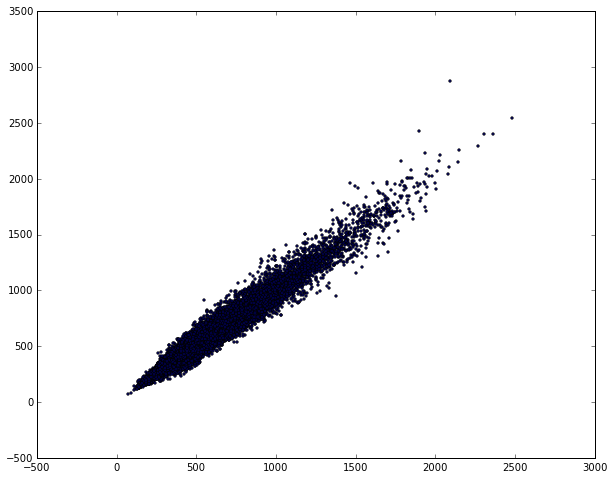

In [43]:
plt.scatter(list(submit7.REN_BASE_RENT), list(submit9.REN_BASE_RENT), marker='.')

In [44]:
submit9.to_csv('submit9.csv', index=False)

# Submit9 
- V  0.1698 
- CV 0.1719 
- HO 0.1786

In [45]:
pfile = 'sub2south_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(13)_100_Informative_Features_sub2test.csv.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit10 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,205.557297
1,12686,141.580948
2,122383,170.111084
3,147691,176.250702
4,152161,152.105392


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,443.125414
std,1526951.230241,154.914322
min,30.000000,45.029831
25%,1315572.500000,355.320259
50%,2638793.000000,412.542084
75%,3964925.250000,490.202682
max,5280763.000000,2388.084473


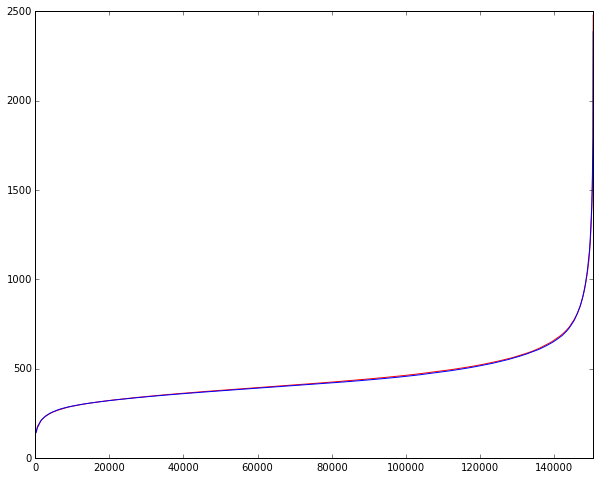

In [46]:
submit7.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit10.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)
sub10 = submit10.describe()
sub10

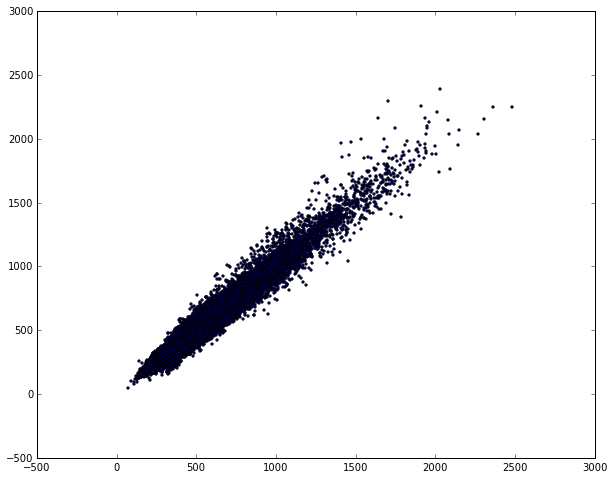

In [47]:
plt.scatter(list(submit7.REN_BASE_RENT), list(submit10.REN_BASE_RENT), marker='.')

In [48]:
submit10.to_csv('submit10.csv', index=False)

# Submit 10  XGB 13
- 0.1698 
- 0.1719 
- 0.1786

In [49]:
pfile = 'sub2south_RuleFit_Regressor_(9)_100_Informative_Features_sub2test.csv.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit11 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,184.702811
1,12686,181.847378
2,122383,181.847378
3,147691,181.847378
4,152161,201.797941


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,431.250934
std,1526951.230241,138.354105
min,30.000000,171.952914
25%,1315572.500000,350.430352
50%,2638793.000000,402.552031
75%,3964925.250000,475.265974
max,5280763.000000,1691.847343


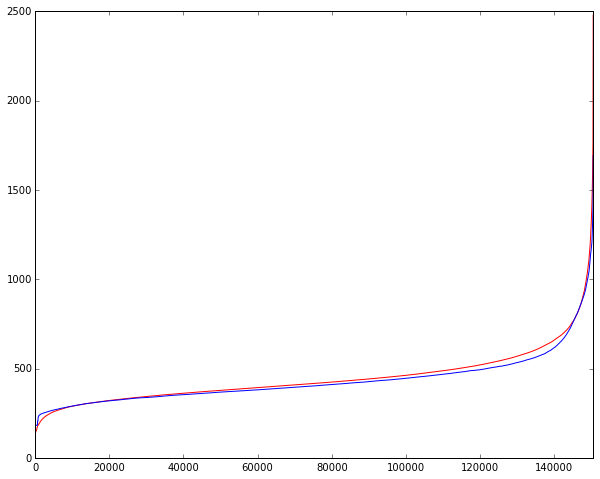

In [50]:
submit7.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit11.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)
sub11 = submit11.describe()
sub11

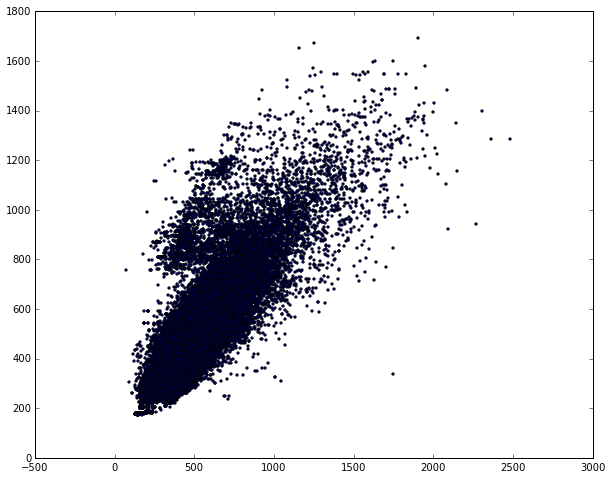

In [51]:
plt.scatter(list(submit7.REN_BASE_RENT), list(submit11.REN_BASE_RENT), marker='.')

In [52]:
submit11.to_csv('submit11.csv', index=False)

# Submit RuleFit 11
- V  0.2462 
- CV 0.2520 
- HO 0.2524

In [53]:
pfile = 'sub2south_RandomForest_Regressor_(17)_100_Informative_Features_sub2test.csv.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit12 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,210.820904
1,12686,175.423754
2,122383,176.790064
3,147691,175.593615
4,152161,173.267329


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,440.867331
std,1526951.230241,121.478868
min,30.000000,172.745030
25%,1315572.500000,378.979611
50%,2638793.000000,420.139670
75%,3964925.250000,472.073099
max,5280763.000000,1882.819825


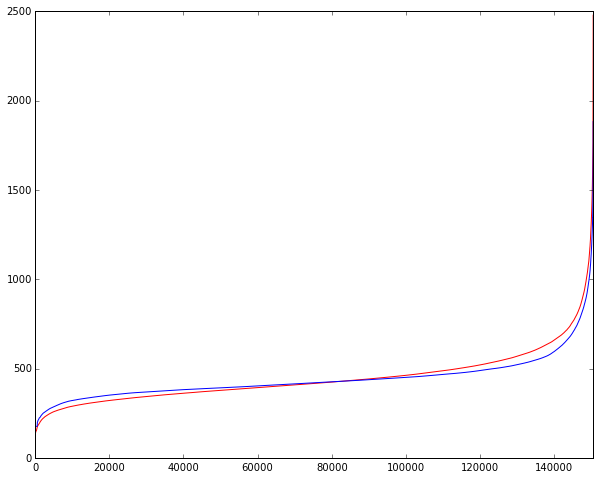

In [54]:
submit7.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit12.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)
sub12 = submit12.describe()
sub12

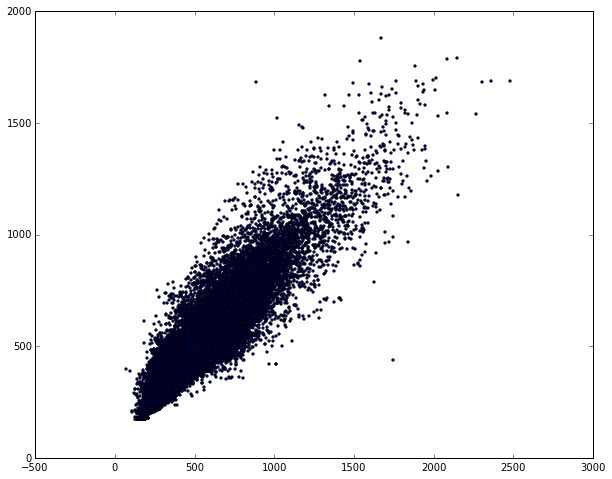

In [55]:
plt.scatter(list(submit7.REN_BASE_RENT), list(submit12.REN_BASE_RENT), marker='.')

In [56]:
submit12.to_csv('submit12.csv', index=False)

# Submit 12 RF 17 
- V  0.2016 
- CV 0.2075 
- HO 0.2096

In [57]:
pfile = 'sub2south_Nystroem_Kernel_SVM_Regressor_(19)_100_Informative_Features_sub2test.csv.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit13 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,194.358889
1,12686,227.918048
2,122383,202.830558
3,147691,201.453562
4,152161,207.071579


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,488.705930
std,1526951.230241,169.824493
min,30.000000,150.940710
25%,1315572.500000,384.049526
50%,2638793.000000,458.280053
75%,3964925.250000,554.846354
max,5280763.000000,2170.844945


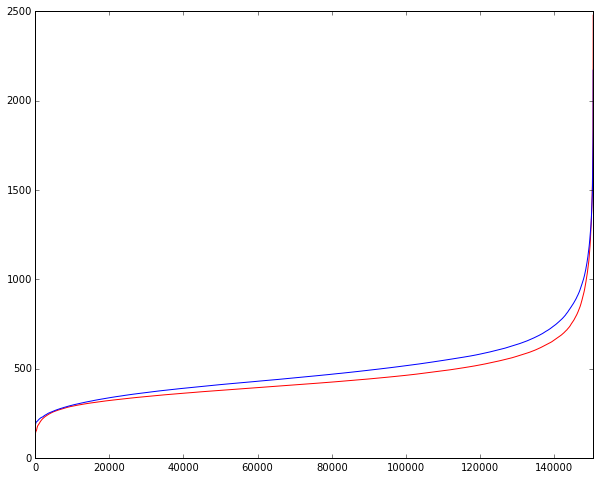

In [58]:
submit7.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit13.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub13 = submit13.describe()
sub13

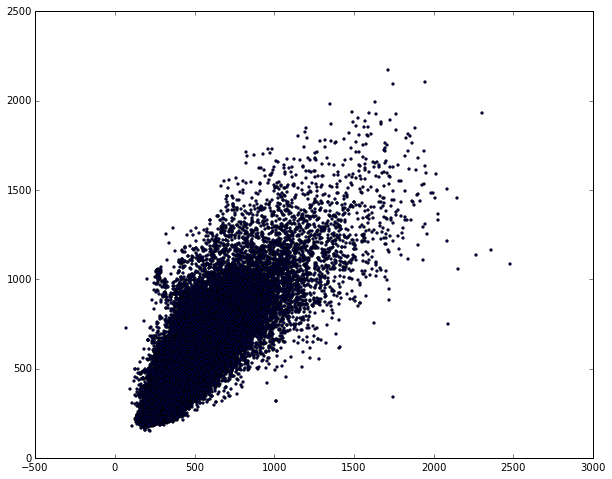

In [59]:
plt.scatter(list(submit7.REN_BASE_RENT), list(submit13.REN_BASE_RENT), marker='.')

In [60]:
submit12.to_csv('submit13.csv', index=False)

# Submit13 SVM 19
- V  0.3285 
- CV 0.3225
- HO 0.3103

In [61]:
pfile = 'sub3south_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(19)_100_Informative_Features_sub3test.csv.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit14 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,135.137283
1,12686,107.467285
2,122383,105.734947
3,147691,106.232124
4,152161,118.735023


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,451.989342
std,1526951.230241,171.291292
min,30.000000,102.667992
25%,1315572.500000,350.513725
50%,2638793.000000,421.322388
75%,3964925.250000,509.139008
max,5280763.000000,3096.185303


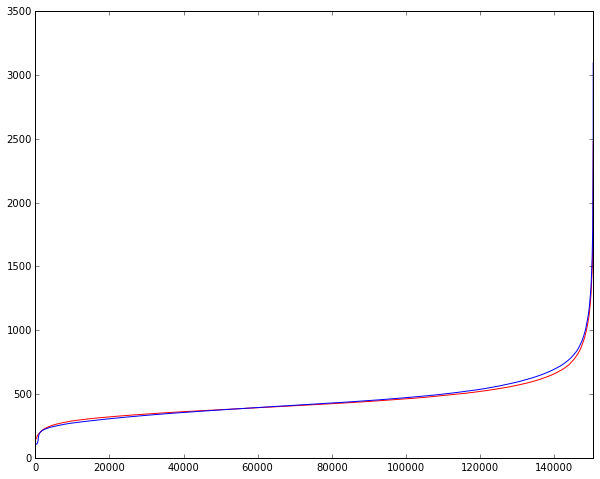

In [62]:
submit7.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit14.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub14 = submit14.describe()
sub14

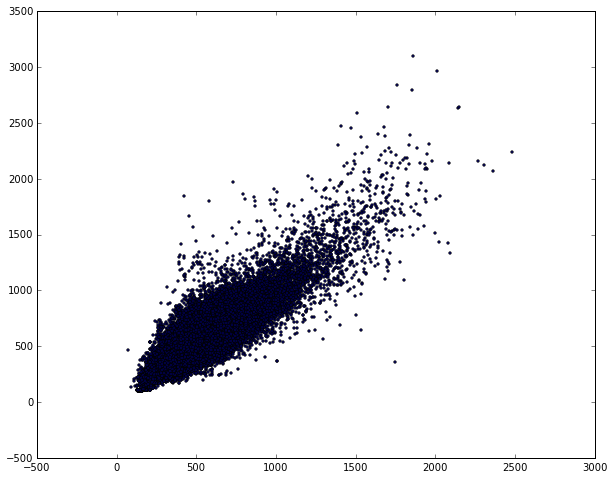

In [63]:
plt.scatter(list(submit7.REN_BASE_RENT), list(submit14.REN_BASE_RENT), marker='.')

In [64]:
submit14.to_csv('submit14.csv', index=False)

# Submit14 0.22625  !
- V  0.1645
- CV 0.1656
- HO 0.1701

In [65]:
pfile = 'sub3south_Advanced_GLM_Blender_(1+3+4+10+11+17+18+19)_(83)_100_Informative_Features_sub3test.csv.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit15 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,135.829791
1,12686,105.128903
2,122383,103.525774
3,147691,103.991497
4,152161,115.469571


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,455.688780
std,1526951.230241,177.960221
min,30.000000,100.711530
25%,1315572.500000,349.322384
50%,2638793.000000,423.738666
75%,3964925.250000,516.781584
max,5280763.000000,3231.818870


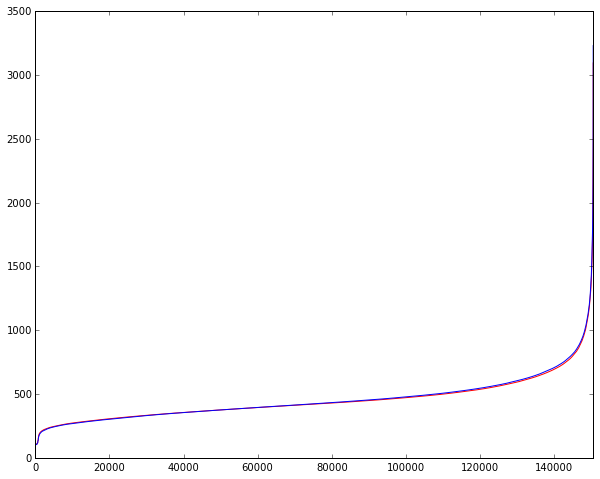

In [66]:
submit14.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit15.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub15 = submit15.describe()
sub15

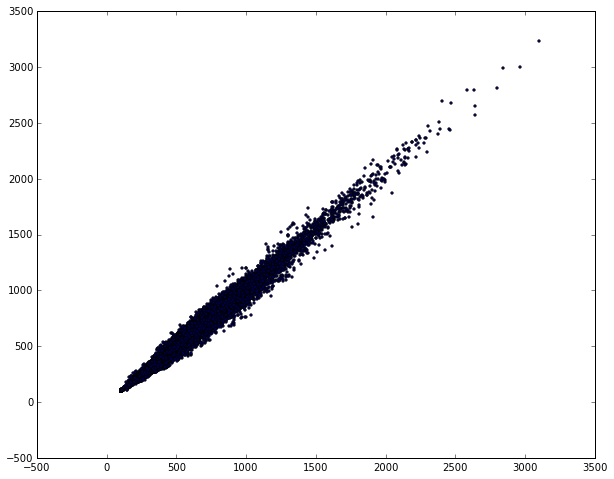

In [67]:
plt.scatter(list(submit14.REN_BASE_RENT), list(submit15.REN_BASE_RENT), marker='.')

In [68]:
submit15.to_csv('submit15.csv', index=False)

# Submit15  0.22514
- V  0.1613 
- CV 0.1624 
- HO 0.1672

In [69]:
pfile = 'sub4south_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(38)_100_Univariate_Selections_sub4test_4.csv.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit16 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,164.223938
1,12686,166.927414
2,122383,179.499039
3,147691,179.499039
4,152161,151.315018


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,343.973294
std,1526951.230241,106.340086
min,30.000000,68.335556
25%,1315572.500000,272.290215
50%,2638793.000000,323.566360
75%,3964925.250000,390.035202
max,5280763.000000,1338.731323


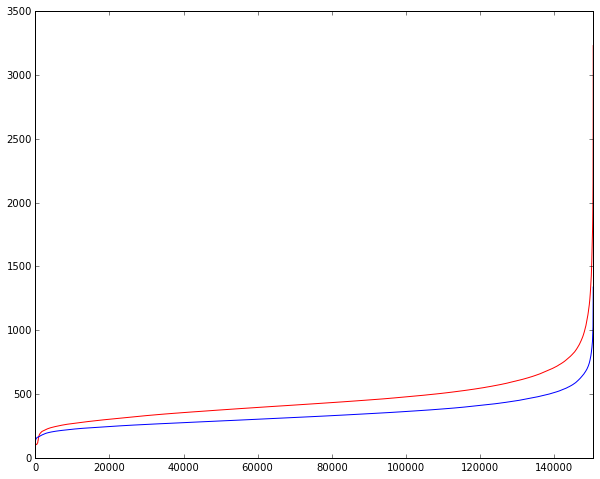

In [70]:
submit15.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit16.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub16 = submit16.describe()
sub16

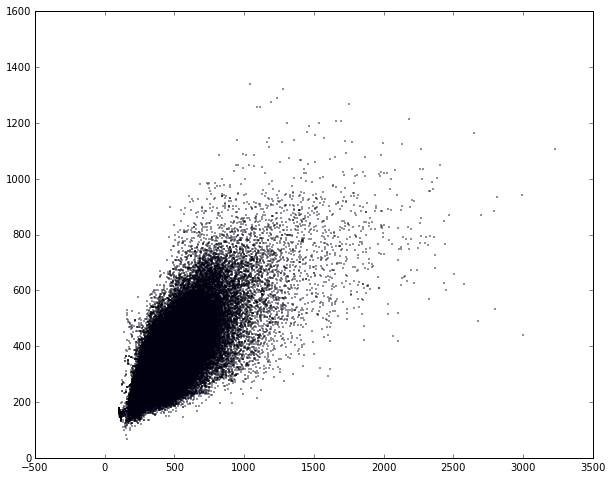

In [71]:
plt.scatter(list(submit15.REN_BASE_RENT), list(submit16.REN_BASE_RENT), marker='.', s=1)

In [72]:
submit16.to_csv('submit16.csv', index=False)

# Submit16   0.41192
- V  0.1613
- CV 0.1597
- HO 0.1554

In [73]:
pfile = 'sub4south_Advanced_GLM_Blender_(23+29+30+32+33+36+37+38)_(125)_100_Univariate_Selections_sub4test_4.csv.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit17 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,177.554944
1,12686,172.368418
2,122383,171.154679
3,147691,171.154679
4,152161,146.008817


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,339.146535
std,1526951.230241,107.148337
min,30.000000,65.319758
25%,1315572.500000,265.305868
50%,2638793.000000,319.308488
75%,3964925.250000,388.794759
max,5280763.000000,1384.109889


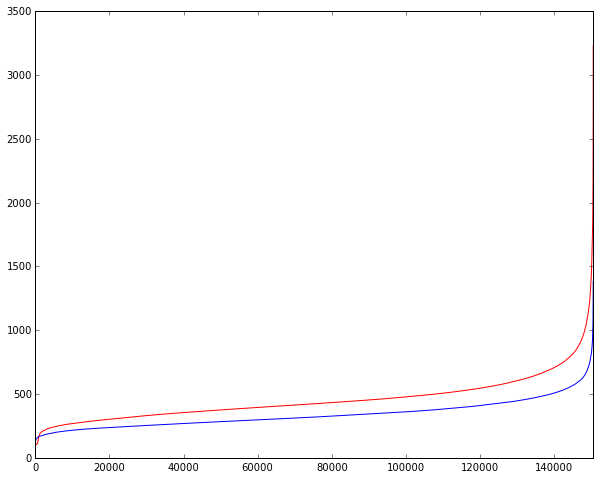

In [74]:
submit15.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit17.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub17 = submit17.describe()
sub17

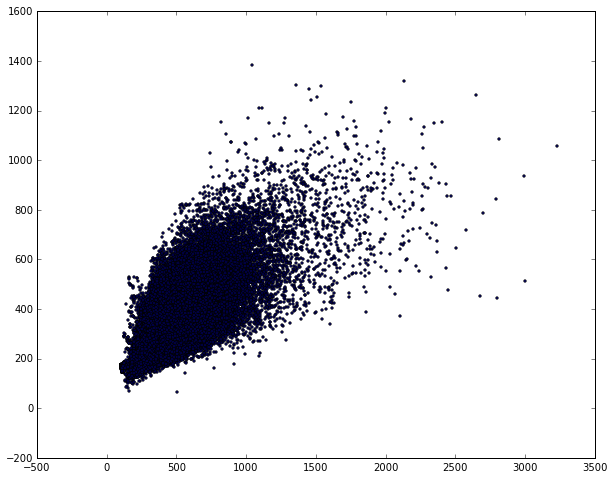

In [75]:
plt.scatter(list(submit15.REN_BASE_RENT), list(submit17.REN_BASE_RENT), marker='.')

In [76]:
submit17.to_csv('submit17.csv', index=False)

# Submit17  0.42467
- V  0.1573 
- CV 0.1557 
- HO 0.1513

In [77]:
pfile = 'sub5south_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(30)_100_Univariate_Selections_sub4test_4.csv.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit18 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,111.969734
1,12686,149.797058
2,122383,166.277832
3,147691,166.277832
4,152161,131.278580


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,415.209454
std,1526951.230241,116.130334
min,30.000000,97.672981
25%,1315572.500000,341.893906
50%,2638793.000000,403.320541
75%,3964925.250000,472.241119
max,5280763.000000,1364.357422


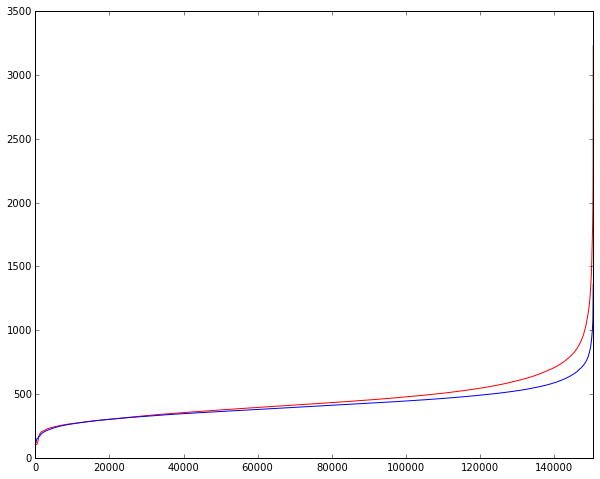

In [78]:
submit15.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit18.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub18 = submit18.describe()
sub18

0.508303457701 183.581271638


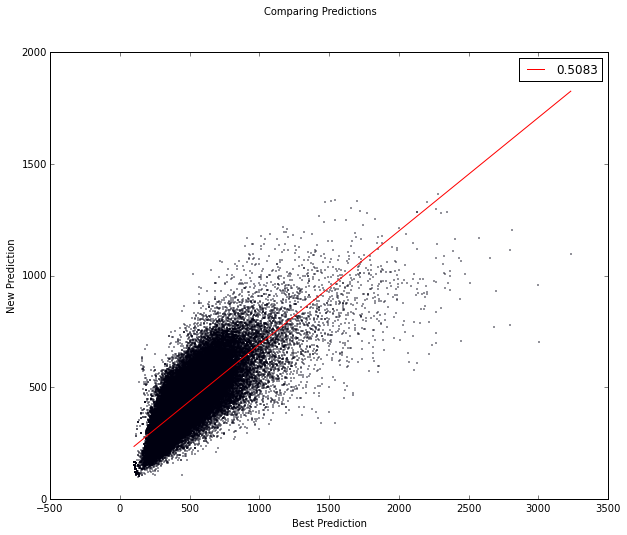

In [79]:
current = list(submit18.REN_BASE_RENT)
best = list(submit15.REN_BASE_RENT)
m, b = np.polyfit(best,current, 1)
x = np.arange(min(best),max(best))
plt.scatter(best, current, marker='.', s=1)
plt.plot(x, m*x + b, 'r-', label='%.4f'%m)
plt.suptitle('Comparing Predictions')
plt.xlabel('Best Prediction')
plt.ylabel('New Prediction')
plt.legend()
print m, b

In [80]:
submit18.to_csv('submit18.csv', index=False)

# Submit18  0.29504
- V 0.1649
- CV 0.1637
- HO 0.1606

In [81]:
pfile = 'sub5south_Advanced_GLM_Blender_(20+22+23+29+30+36+37+38)_(91)_100_Univariate_Selections_sub4test_4.csv.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit19 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,103.218623
1,12686,123.490999
2,122383,128.465256
3,147691,128.465256
4,152161,120.551298


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,411.013382
std,1526951.230241,120.044647
min,30.000000,95.847181
25%,1315572.500000,334.407234
50%,2638793.000000,395.198732
75%,3964925.250000,470.264621
max,5280763.000000,1416.292456


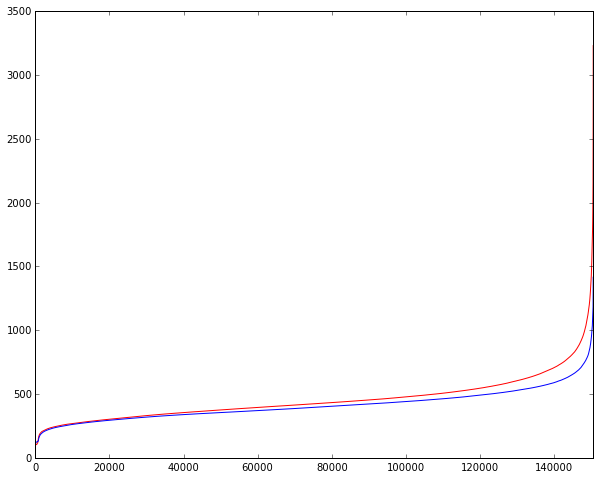

In [82]:
submit15.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit19.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub19 = submit19.describe()
sub19

0.537887190252 165.904223953


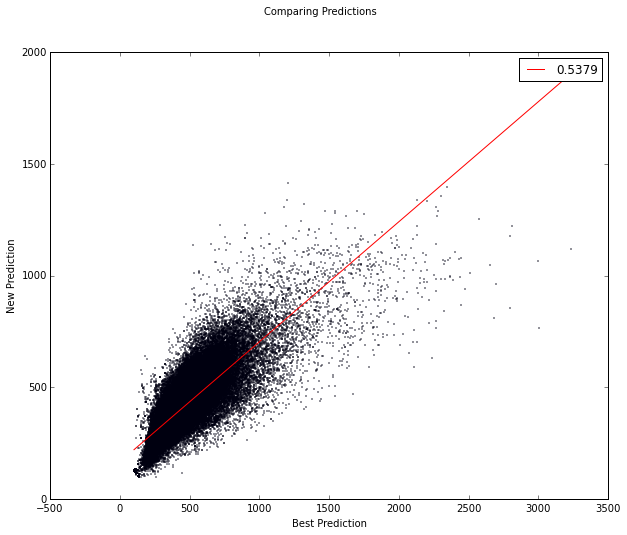

In [83]:
current = list(submit19.REN_BASE_RENT)
best = list(submit15.REN_BASE_RENT)
m, b = np.polyfit(best,current, 1)
x = np.arange(min(best),max(best))
plt.scatter(best, current, marker='.', s=1)
plt.plot(x, m*x + b, 'r-', label='%.4f'%m)
plt.suptitle('Comparing Predictions')
plt.xlabel('Best Prediction')
plt.ylabel('New Prediction')
plt.legend()
print m, b

In [84]:
submit19.to_csv('submit19.csv', index=False)

# Submit19 0.29339
- V  0.1600
- CV 0.1592
- HO 0.1557

In [85]:
pfile = 'south_fix_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(30)_100_Univariate_Selections_rent_test.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit20 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,125.303276
1,12686,97.991936
2,122383,102.979683
3,147691,102.979683
4,152161,103.445305


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,442.716725
std,1526951.230241,181.921411
min,30.000000,38.090034
25%,1315572.500000,332.118332
50%,2638793.000000,406.451645
75%,3964925.250000,502.421555
max,5280763.000000,2644.777100


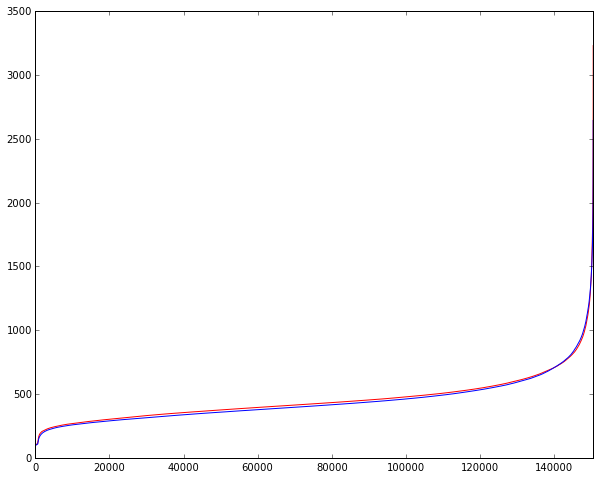

In [86]:
submit15.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit20.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub20 = submit20.describe()
sub20

0.929401430565 19.1989212826


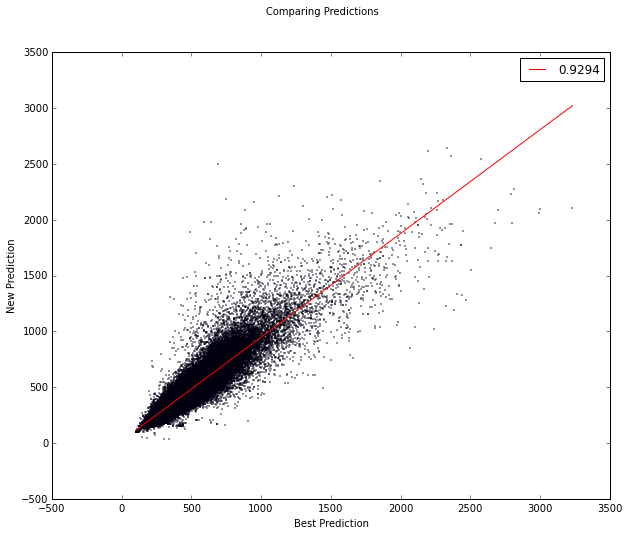

In [87]:
current = list(submit20.REN_BASE_RENT)
best = list(submit15.REN_BASE_RENT)
m, b = np.polyfit(best,current, 1)
x = np.arange(min(best),max(best))
plt.scatter(best, current, marker='.', s=1)
plt.plot(x, m*x + b, 'r-', label='%.4f'%m)
plt.suptitle('Comparing Predictions')
plt.xlabel('Best Prediction')
plt.ylabel('New Prediction')
plt.legend()
print m, b

In [88]:
submit20.to_csv('submit20.csv', index=False)

# Submit20 0.22658
- V  0.1632 
- CV 0.1615 
- HO 0.1603

In [89]:
pfile = 'south_fix_GLM_Blender_(47+48+49)_(26)_100_F1_rent_test.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit21 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,118.123270
1,12686,98.673189
2,122383,100.435618
3,147691,100.435618
4,152161,101.644175


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,472.575706
std,1526951.230241,207.099741
min,30.000000,33.666327
25%,1315572.500000,354.024319
50%,2638793.000000,430.169442
75%,3964925.250000,532.479462
max,5280763.000000,3370.246021


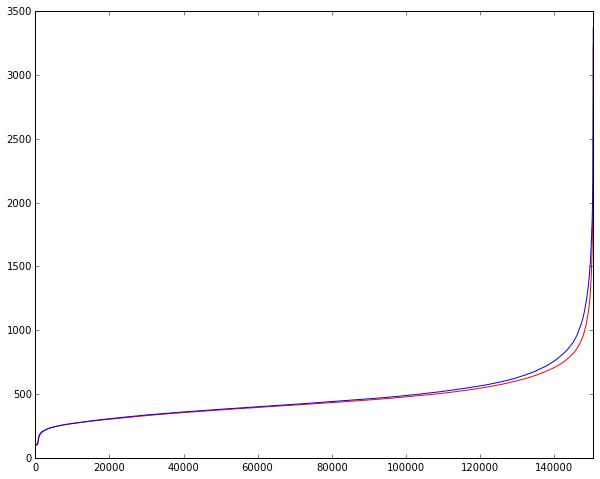

In [90]:
submit15.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit21.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub21 = submit21.describe()
sub21

1.04532419744 -3.7668021735


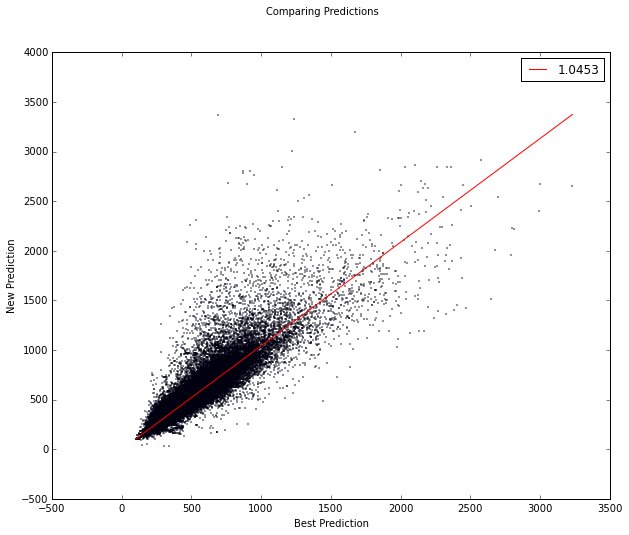

In [91]:
current = list(submit21.REN_BASE_RENT)
best = list(submit15.REN_BASE_RENT)
m, b = np.polyfit(best,current, 1)
x = np.arange(min(best),max(best))
plt.scatter(best, current, marker='.', s=1)
plt.plot(x, m*x + b, 'r-', label='%.4f'%m)
plt.suptitle('Comparing Predictions')
plt.xlabel('Best Prediction')
plt.ylabel('New Prediction')
plt.legend()
print m, b

In [92]:
submit21.to_csv('submit21.csv', index=False)

# Submit21 0.22813

In [93]:
submit22 = submit21.copy()

In [94]:
submit22.loc[submit22.REN_BASE_RENT > 400,'REN_BASE_RENT'] = submit22.loc[submit22.REN_BASE_RENT > 400] *0.95

In [95]:
submit22.loc[submit22.REN_BASE_RENT > (400*0.95),'REN_BASE_RENT']

852        387.374894
859        383.727608
862        396.960459
863        395.194203
865        388.114967
866        443.449628
868        472.117814
882        663.896715
901        483.593898
903        408.199781
904        492.943504
905        520.602626
916        509.110076
933        451.453712
936        668.705960
944        386.678167
960        395.649268
970        467.926585
979        436.710269
996        397.020162
1001       406.123798
1007       496.023140
1017       537.428172
1018       392.717936
1024       568.898327
1027       491.973717
1032       396.126491
1034       398.812904
1037       664.134970
1040       416.144408
             ...     
150470     880.454020
150471     565.891018
150472     493.591210
150473     475.000435
150474     492.564476
150475     448.659822
150476     448.517554
150477     425.353013
150478     633.231466
150479     513.495126
150480     859.514384
150483     776.213629
150484    1660.418987
150485     481.142630
150486    

In [96]:
submit22[:20]

,REN_ID,REN_BASE_RENT
0,10568,118.123270
1,12686,98.673189
2,122383,100.435618
3,147691,100.435618
4,152161,101.644175
5,185987,98.673189
6,186370,100.435618
7,195205,98.673189
8,197848,98.673189
9,215028,101.644175


In [97]:
submit22.to_csv('submit22.csv', index=False)

# Submit22  0.22539 Hack: lower higher prices

In [98]:
submit23 = submit20.copy()
submit23.loc[submit23.REN_BASE_RENT > 400,'REN_BASE_RENT'] = submit23.loc[submit23.REN_BASE_RENT > 400] *0.95

,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,428.230124
std,1526951.230241,168.224970
min,30.000000,38.090034
25%,1315572.500000,332.118332
50%,2638793.000000,393.089323
75%,3964925.250000,477.300477
max,5280763.000000,2512.538245


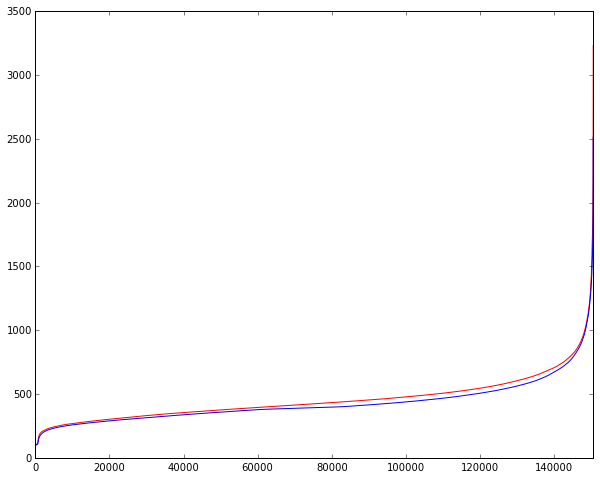

In [99]:
submit15.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit23.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub23 = submit23.describe()
sub23

0.858438065397 37.0495289835


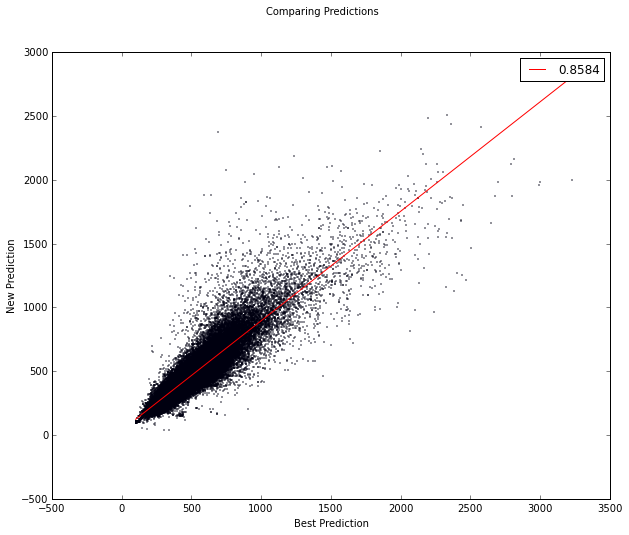

In [100]:
current = list(submit23.REN_BASE_RENT)
best = list(submit15.REN_BASE_RENT)
m, b = np.polyfit(best,current, 1)
x = np.arange(min(best),max(best))
plt.scatter(best, current, marker='.', s=1)
plt.plot(x, m*x + b, 'r-', label='%.4f'%m)
plt.suptitle('Comparing Predictions')
plt.xlabel('Best Prediction')
plt.ylabel('New Prediction')
plt.legend()
print m, b

In [101]:
submit23.to_csv('submit23.csv', index=False)

# Submit23  0.23097

In [102]:
train20 = pd.read_csv('south_fix_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(30)_100_Univariate_Selections.csv')
train20[:20]

,RowId,Partition,Cross-Validation Prediction
0,1,4.0,121.852875
1,2,2.0,178.526001
2,3,Holdout,104.250374
3,4,4.0,173.796570
4,5,0.0,136.923370
5,6,1.0,216.744995
6,7,1.0,170.293869
7,8,4.0,135.624512
8,9,0.0,171.383987
9,10,3.0,418.861176


In [103]:
train20.columns = ['ren_id','Partition','CVPrediction']

In [104]:
train = pd.read_csv('rent_train.csv.gz')

In [105]:
train[:2]

,ren_id,carbay_under_cover,lnp_pin,open_car_bay,sitting_room,shed_area_1,alfresco_room,ren_date_eff_from,rent_year,theatre_room,...,year_effective_new,bedrooms,lounge_room,below_ground_pool,carport_detached,spa_room,lift,ren_base_rent,sa4_mean_rent,log_sa4_mean_rent
0,1106,NaN,574809,NaN,NaN,NaN,NaN,2001-01-01,2001,NaN,...,1973,3,1,NaN,NaN,NaN,NaN,155,190.386472,5.249056
1,69250,NaN,503403,NaN,NaN,NaN,NaN,2001-01-01,2001,NaN,...,1983,4,1,NaN,NaN,NaN,NaN,175,159.745182,5.073580


In [106]:
len(train20.index)

782762

In [107]:
len(train.index)

782762

In [108]:
train20.ren_id = train.ren_id

In [109]:
train20.set_index('ren_id')
train.set_index('ren_id')
train20.shape

(782762, 3)

In [110]:
deltadf = train.copy()
deltadf['cvprediction'] = train20.CVPrediction
deltadf['diffs'] = train20.CVPrediction - train.ren_base_rent
deltadf[:20]

,ren_id,carbay_under_cover,lnp_pin,open_car_bay,sitting_room,shed_area_1,alfresco_room,ren_date_eff_from,rent_year,theatre_room,...,lounge_room,below_ground_pool,carport_detached,spa_room,lift,ren_base_rent,sa4_mean_rent,log_sa4_mean_rent,cvprediction,diffs
0,1106,NaN,574809,NaN,NaN,NaN,NaN,2001-01-01,2001,NaN,...,1,NaN,NaN,NaN,NaN,155,190.386472,5.249056,121.852875,-33.147125
1,69250,NaN,503403,NaN,NaN,NaN,NaN,2001-01-01,2001,NaN,...,1,NaN,NaN,NaN,NaN,175,159.745182,5.073580,178.526001,3.526001
2,71245,NaN,1087818,NaN,NaN,NaN,NaN,2001-01-01,2001,NaN,...,1,NaN,NaN,NaN,NaN,90,127.986607,4.851926,104.250374,14.250374
3,84769,NaN,118858,NaN,NaN,NaN,NaN,2001-01-01,2001,NaN,...,1,NaN,NaN,NaN,NaN,170,157.135261,5.057107,173.796570,3.796570
4,285786,NaN,430266,NaN,NaN,NaN,NaN,2001-01-01,2001,NaN,...,1,NaN,NaN,NaN,NaN,140,142.079787,4.956389,136.923370,-3.076630
5,306982,NaN,1193767,NaN,NaN,NaN,NaN,2001-01-01,2001,NaN,...,1,NaN,NaN,NaN,NaN,220,157.135261,5.057107,216.744995,-3.255005
6,337856,NaN,1089379,NaN,NaN,NaN,NaN,2001-01-01,2001,NaN,...,1,NaN,NaN,NaN,NaN,120,157.135261,5.057107,170.293869,50.293869
7,413301,NaN,575032,NaN,NaN,NaN,NaN,2001-01-01,2001,NaN,...,1,NaN,NaN,NaN,NaN,130,190.386472,5.249056,135.624512,5.624512
8,550490,NaN,440336,NaN,NaN,NaN,NaN,2001-01-01,2001,NaN,...,1,NaN,NaN,NaN,NaN,170,142.079787,4.956389,171.383987,1.383987
9,552771,NaN,94946,NaN,NaN,NaN,NaN,2001-01-01,2001,NaN,...,1,NaN,NaN,NaN,NaN,450,157.135261,5.057107,418.861176,-31.138824


In [111]:
comparedf = deltadf[['ren_id','ren_base_rent','cvprediction','diffs']].sort_values('ren_base_rent')

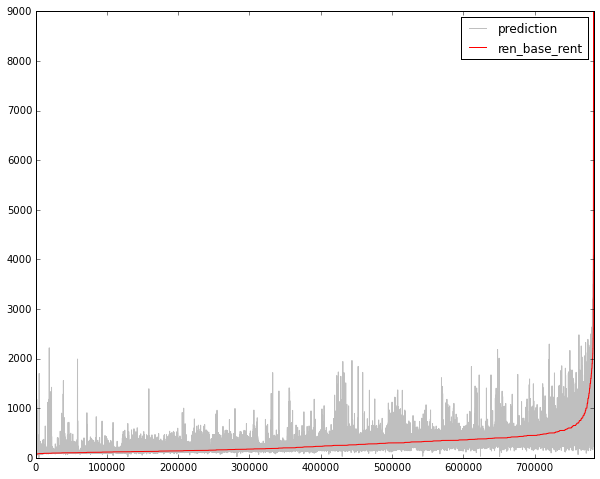

In [112]:
comparedf.cvprediction.plot(use_index=False, color='0.75', label='prediction')
comparedf.ren_base_rent.plot(use_index=False, color='red', label='ren_base_rent')
plt.legend()

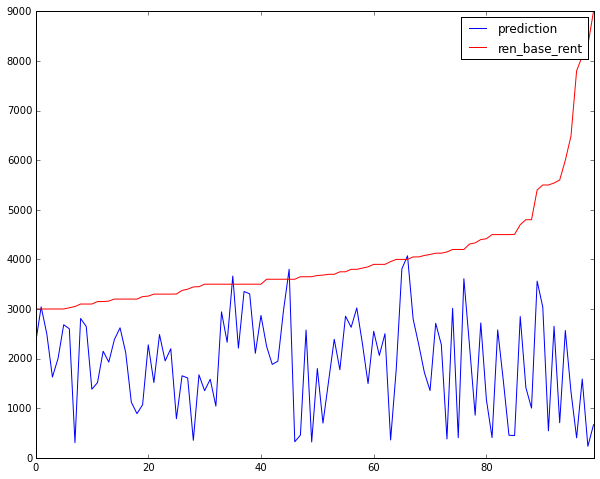

In [113]:
comparedf.cvprediction[-100:].plot(use_index=False, color='blue', label='prediction')
comparedf.ren_base_rent[-100:].plot(use_index=False, color='red', label='ren_base_rent')
plt.legend()

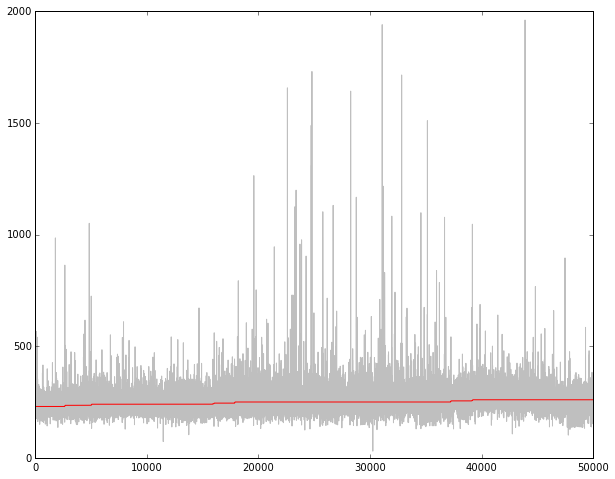

In [114]:
comparedf.cvprediction.iloc[400000:450000].plot(use_index=False, color='0.75')
comparedf.ren_base_rent.iloc[400000:450000].plot(use_index=False, color='red')

In [115]:
deltadf.groupby('sa4_code_2011').diffs.mean()

sa4_code_2011
A501    -3.937989
A502    -3.804177
A503    -3.872086
A504    -2.110276
A505    -4.379793
A506    -4.886228
A507    -4.934493
A508   -29.606349
A509    -4.536992
A901   -18.315307
Name: diffs, dtype: float64

In [116]:
sa7s = pd.DataFrame([deltadf.groupby('sa1_7').diffs.mean().tolist(), deltadf.groupby('sa1_7').diffs.count().tolist()]).T

In [117]:
# looking for high count high diff places
sa7s.columns = ['mean','count']
sa7s.set_index(deltadf.groupby('sa1_7').diffs.mean().index, inplace=True)
sa7s.sort_values(by='mean')

,mean,count
sa1_7,,
A5122207,-2180.375000,1
A5120610,-522.919617,5
A5120502,-415.826538,1
A5119712,-400.262337,1
A5121807,-346.314392,4
A5113619,-256.402727,7
A5103001,-251.642664,6
A5121914,-251.124023,2
A5121810,-240.138508,25


In [118]:
deltadf.groupby('sa1_7').diffs.count()

sa1_7
A5100101      1
A5100102     59
A5100103    159
A5100104    123
A5100105    130
A5100107     17
A5100109      3
A5100110      1
A5100111     19
A5100114    171
A5100115      2
A5100202     17
A5100204    138
A5100205     15
A5100206     91
A5100207     88
A5100208    154
A5100209    156
A5100210    133
A5100211    381
A5100212    178
A5100213    132
A5100214     61
A5100215    200
A5100216    153
A5100217     72
A5100218     66
A5100219    176
A5100220    204
A5100221    214
           ... 
A5124802    139
A5124803    172
A5124804     36
A5124807     15
A5124901     37
A5124902     60
A5124903      2
A5124905    113
A5124906      5
A5124907     18
A5124908     67
A5124909      9
A5124910     67
A5124911     88
A5124912    108
A5124913     88
A5125001     22
A5125002     46
A5125003     24
A5125004     16
A5125005     38
A5125006     21
A5125010      1
A5125011      2
A5125012      1
A5125013     15
A9100103     34
A9100104     18
A9100105     28
A9100202     38
Name: diffs, dtype

In [119]:
pfile ='south2009_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(42)_100_Univariate_Selections_rent_test.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit24 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,171.100800
1,12686,157.423508
2,122383,188.050903
3,147691,188.050903
4,152161,158.258087


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,451.092461
std,1526951.230241,180.825116
min,30.000000,14.603447
25%,1315572.500000,344.552803
50%,2638793.000000,416.753632
75%,3964925.250000,512.506668
max,5280763.000000,2940.855957


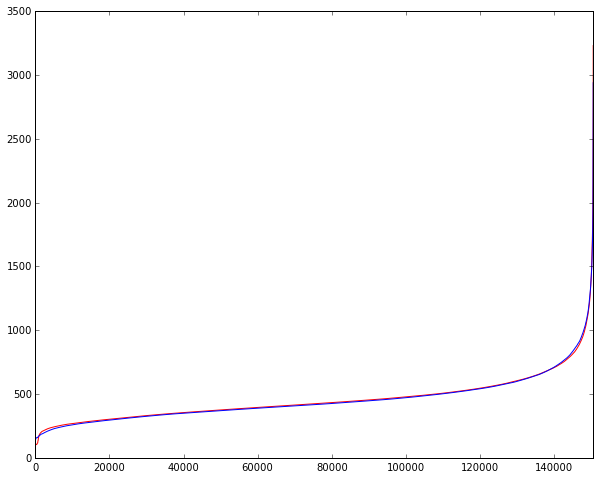

In [120]:
submit15.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit24.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub24 = submit24.describe()
sub24

0.923672139601 30.1854307284


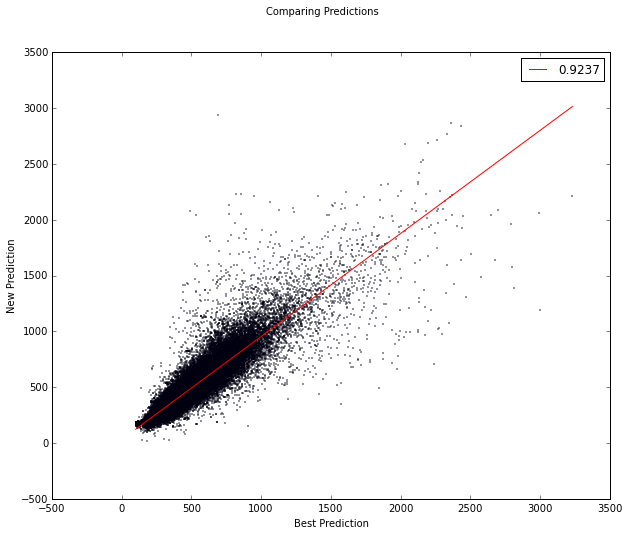

In [121]:
current = list(submit24.REN_BASE_RENT)
best = list(submit15.REN_BASE_RENT)
m, b = np.polyfit(best,current, 1)
x = np.arange(min(best),max(best))
plt.scatter(best, current, marker='.', s=1)
plt.plot(x, m*x + b, 'r-', label='%.4f'%m)
plt.suptitle('Comparing Predictions')
plt.xlabel('Best Prediction')
plt.ylabel('New Prediction')
plt.legend()
print m, b

In [122]:
submit24.to_csv('submit24.csv', index=False)

# Submit24  0.22748
- V  0.1869 
- CV 0.1877 
- HO 0.1870

In [124]:
pfile = 'south10_pins_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(13)_100_Informative_Features_rent_test10.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit25 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,156.176407
1,12686,158.671753
2,122383,204.085159
3,147691,216.547913
4,152161,170.910675


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,413.799615
std,1526951.230241,177.117042
min,30.000000,53.564472
25%,1315572.500000,316.670021
50%,2638793.000000,379.778687
75%,3964925.250000,458.514496
max,5280763.000000,2926.265381


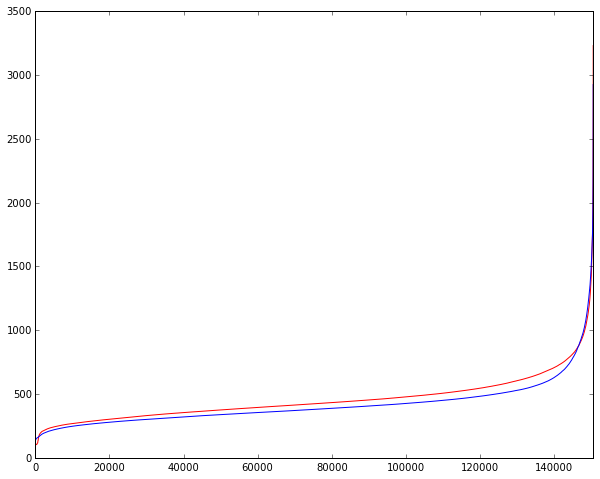

In [125]:
submit15.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit25.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub25 = submit25.describe()
sub25

0.829336209252 35.880409395


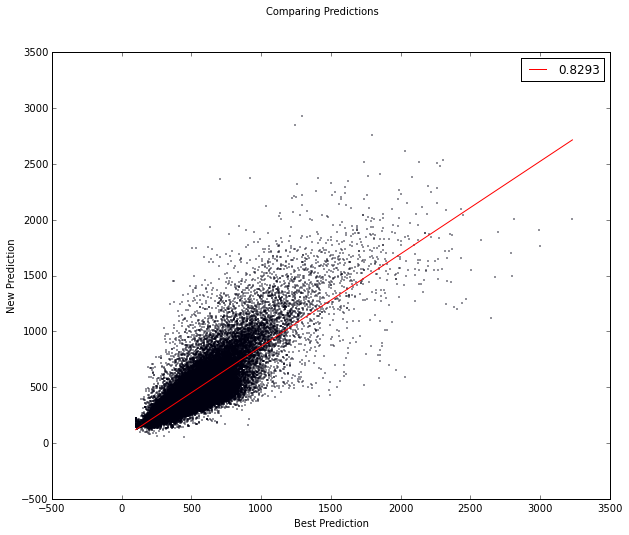

In [126]:
current = list(submit25.REN_BASE_RENT)
best = list(submit15.REN_BASE_RENT)
m, b = np.polyfit(best,current, 1)
x = np.arange(min(best),max(best))
plt.scatter(best, current, marker='.', s=1)
plt.plot(x, m*x + b, 'r-', label='%.4f'%m)
plt.suptitle('Comparing Predictions')
plt.xlabel('Best Prediction')
plt.ylabel('New Prediction')
plt.legend()
print m, b

In [127]:
# submit25.to_csv('submit25.csv', index=False)

# Submit25  0.28747
- V  0.1625 
- CV 0.1730 
- HO 0.1692

In [128]:
pfile = 'south11_2004_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(13)_100_Informative_Features_rent_test11.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit26 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,156.442093
1,12686,150.634201
2,122383,185.029877
3,147691,176.918808
4,152161,138.901611


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,449.107051
std,1526951.230241,177.499859
min,30.000000,40.825043
25%,1315572.500000,350.123665
50%,2638793.000000,410.505875
75%,3964925.250000,498.317741
max,5280763.000000,2635.227783


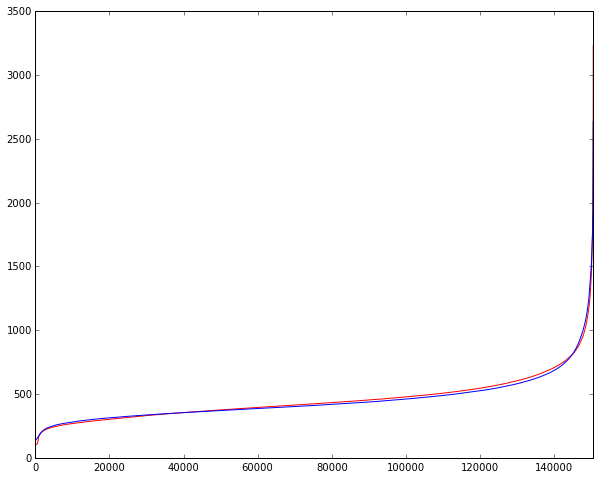

In [129]:
submit15.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit26.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub26 = submit26.describe()
sub26

0.869686374492 52.8007279004


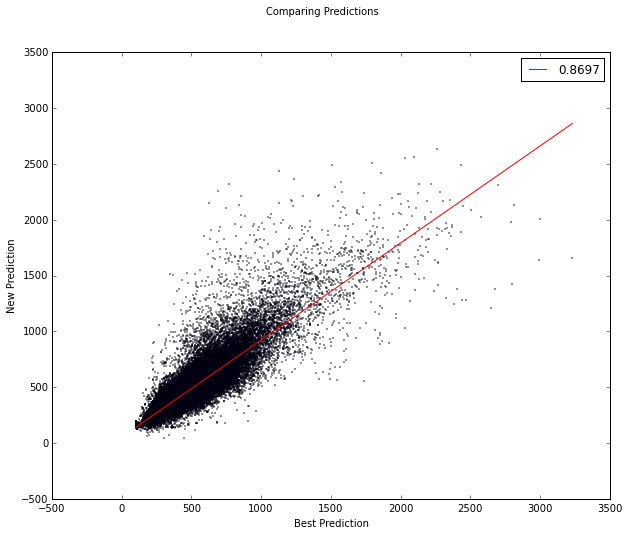

In [130]:
current = list(submit26.REN_BASE_RENT)
best = list(submit15.REN_BASE_RENT)
m, b = np.polyfit(best,current, 1)
x = np.arange(min(best),max(best))
plt.scatter(best, current, marker='.', s=1)
plt.plot(x, m*x + b, 'r-', label='%.4f'%m)
plt.suptitle('Comparing Predictions')
plt.xlabel('Best Prediction')
plt.ylabel('New Prediction')
plt.legend()
print m, b

In [131]:
# submit26.to_csv('submit26.csv', index=False)

# Submit26  0.24331
- V  0.1678 
- CV 0.1719 
- HO 0.1705

In [132]:
pfile = 'south2009_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(21)_100_Informative_Features_rent_test.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit27 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,167.226120
1,12686,187.918259
2,122383,215.284058
3,147691,214.287521
4,152161,167.640305


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,447.662536
std,1526951.230241,180.384328
min,30.000000,11.178362
25%,1315572.500000,340.120026
50%,2638793.000000,411.765091
75%,3964925.250000,507.352478
max,5280763.000000,2671.546631


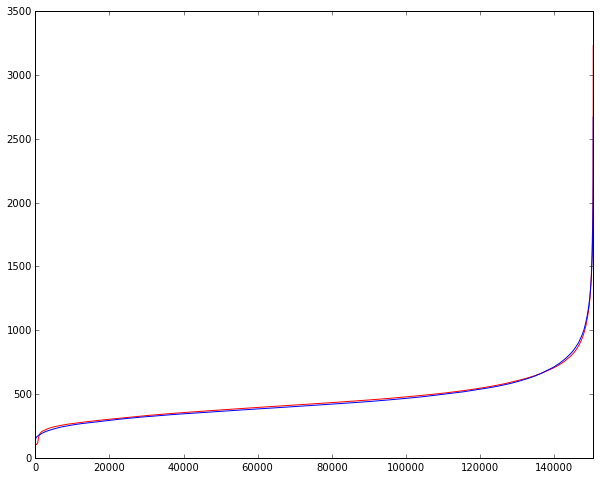

In [133]:
submit15.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit27.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub27 = submit27.describe()
sub27

0.930231615088 23.7664259477


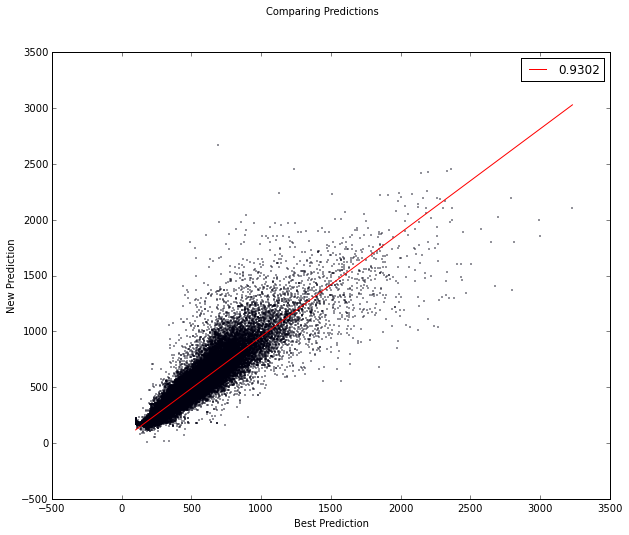

In [134]:
current = list(submit27.REN_BASE_RENT)
best = list(submit15.REN_BASE_RENT)
m, b = np.polyfit(best,current, 1)
x = np.arange(min(best),max(best))
plt.scatter(best, current, marker='.', s=1)
plt.plot(x, m*x + b, 'r-', label='%.4f'%m)
plt.suptitle('Comparing Predictions')
plt.xlabel('Best Prediction')
plt.ylabel('New Prediction')
plt.legend()
print m, b

In [135]:
# submit27.to_csv('submit27.csv', index=False)

# Submit27 0.22436
- V  0.1851
- CV 0.1863 
- HO 0.1852

In [136]:
pfile ='south2009_Advanced_GLM_Blender_(22+30+31+32+34+39+40+42)_(92)_100_Univariate_Selections_rent_test.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit28 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,174.947515
1,12686,165.864969
2,122383,197.424577
3,147691,197.424577
4,152161,167.253568


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,454.996360
std,1526951.230241,183.312544
min,30.000000,13.201083
25%,1315572.500000,346.583153
50%,2638793.000000,419.085268
75%,3964925.250000,516.504809
max,5280763.000000,2965.014565


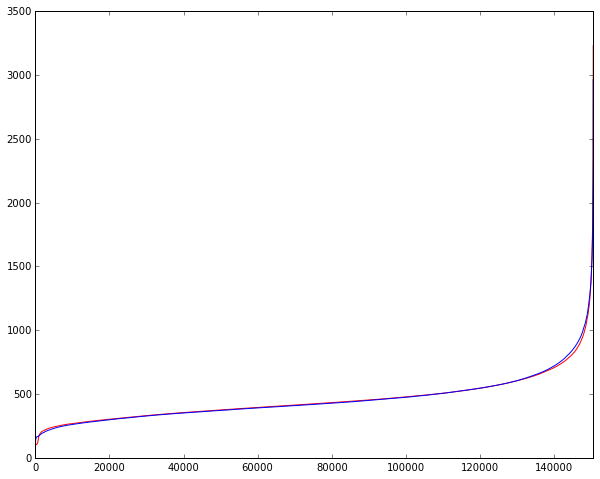

In [137]:
submit15.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit28.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub28 = submit28.describe()
sub28

0.940027827153 26.6362263533


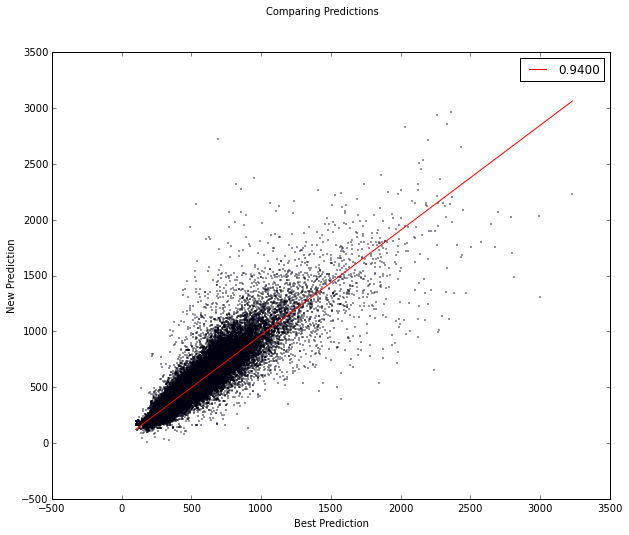

In [138]:
current = list(submit28.REN_BASE_RENT)
best = list(submit15.REN_BASE_RENT)
m, b = np.polyfit(best,current, 1)
x = np.arange(min(best),max(best))
plt.scatter(best, current, marker='.', s=1)
plt.plot(x, m*x + b, 'r-', label='%.4f'%m)
plt.suptitle('Comparing Predictions')
plt.xlabel('Best Prediction')
plt.ylabel('New Prediction')
plt.legend()
print m, b

In [139]:
# submit28.to_csv('submit28.csv', index=False)

# Submit28 0.22303
- V  0.1859
- CV 0.1868
- HO 0.1860

In [140]:
pfile = 'south11_2004_all_pins_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(30)_100_Univariate_Selections_rent_test11.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit29 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,123.739159
1,12686,99.346649
2,122383,101.351723
3,147691,101.351723
4,152161,100.224617


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,445.322116
std,1526951.230241,180.948726
min,30.000000,15.319633
25%,1315572.500000,336.807167
50%,2638793.000000,409.270065
75%,3964925.250000,504.968796
max,5280763.000000,2725.146973


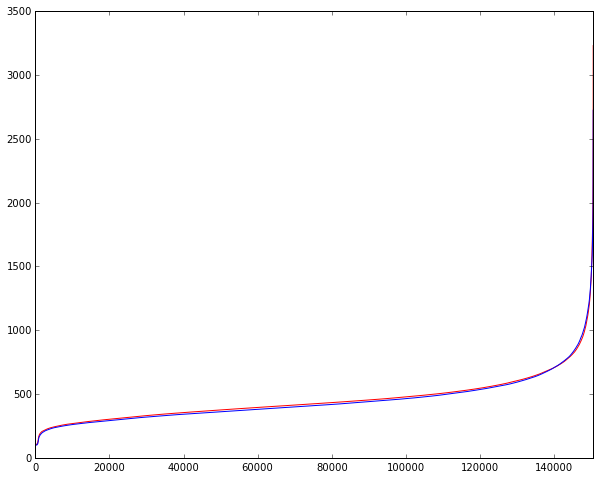

In [141]:
submit15.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit29.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub29 = submit29.describe()
sub29

0.929334061502 21.8350107783


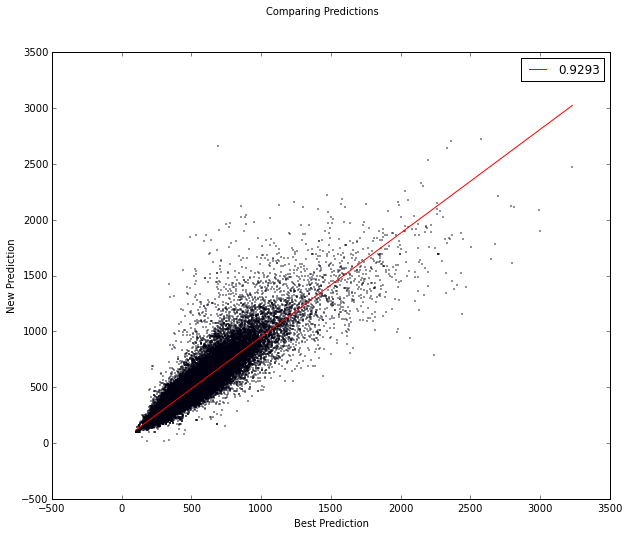

In [142]:
current = list(submit29.REN_BASE_RENT)
best = list(submit15.REN_BASE_RENT)
m, b = np.polyfit(best,current, 1)
x = np.arange(min(best),max(best))
plt.scatter(best, current, marker='.', s=1)
plt.plot(x, m*x + b, 'r-', label='%.4f'%m)
plt.suptitle('Comparing Predictions')
plt.xlabel('Best Prediction')
plt.ylabel('New Prediction')
plt.legend()
print m, b

In [143]:
# submit29.to_csv('submit29.csv', index=False)

# Submit29 

In [144]:
pfile = 'south11_2004_slow_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(38)_100_Univariate_Selections_rent_test11.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit30 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,123.694016
1,12686,100.767975
2,122383,100.179787
3,147691,100.179787
4,152161,102.828079


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,455.946082
std,1526951.230241,183.946233
min,30.000000,14.300412
25%,1315572.500000,345.883255
50%,2638793.000000,418.604797
75%,3964925.250000,515.624512
max,5280763.000000,2690.178955


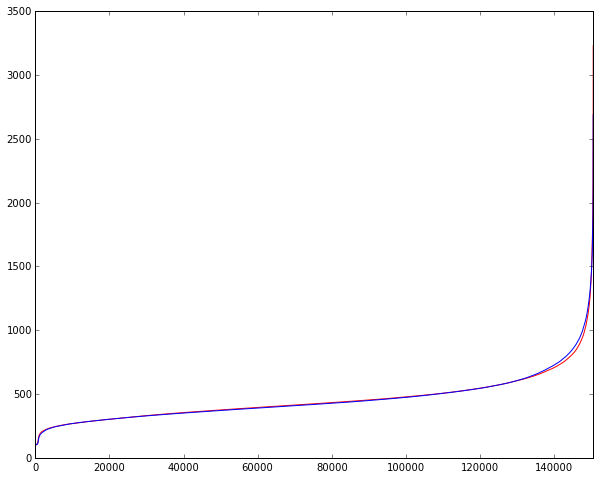

In [145]:
submit15.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit30.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub30 = submit30.describe()
sub30

0.948610052073 23.6751241909


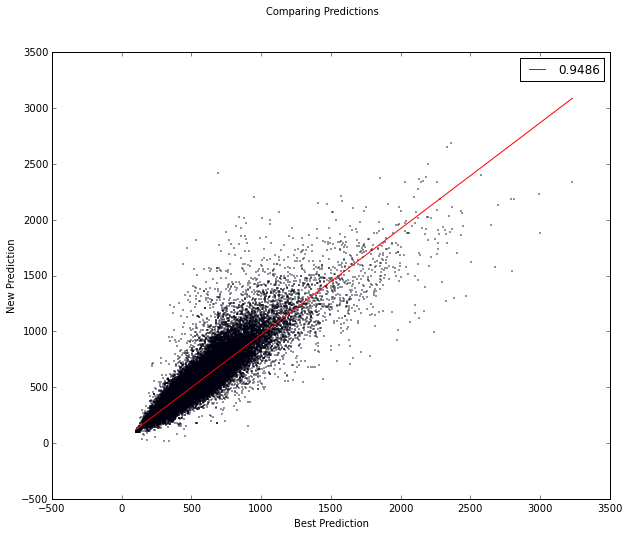

In [146]:
current = list(submit30.REN_BASE_RENT)
best = list(submit15.REN_BASE_RENT)
m, b = np.polyfit(best,current, 1)
x = np.arange(min(best),max(best))
plt.scatter(best, current, marker='.', s=1)
plt.plot(x, m*x + b, 'r-', label='%.4f'%m)
plt.suptitle('Comparing Predictions')
plt.xlabel('Best Prediction')
plt.ylabel('New Prediction')
plt.legend()
print m, b

In [147]:
# submit30.to_csv('submit30.csv', index=False)

# Submit30 0.21866

In [148]:
pfile = 'south11_2004_slow_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(30)_100_Univariate_Selections_rent_test11.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit31 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,124.562691
1,12686,98.806549
2,122383,102.015709
3,147691,102.015709
4,152161,102.338501


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,447.334261
std,1526951.230241,181.444338
min,30.000000,25.572281
25%,1315572.500000,339.438995
50%,2638793.000000,409.040176
75%,3964925.250000,504.555443
max,5280763.000000,2821.460938


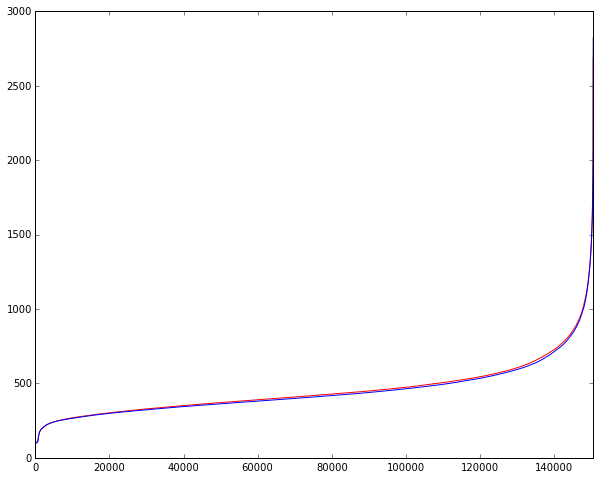

In [149]:
submit30.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit31.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub31 = submit31.describe()
sub31

0.960351857767 9.4655940466


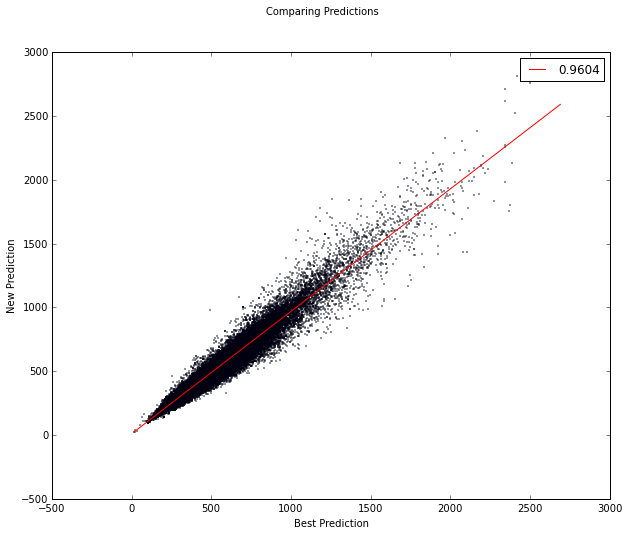

In [150]:
current = list(submit31.REN_BASE_RENT)
best = list(submit30.REN_BASE_RENT)
m, b = np.polyfit(best,current, 1)
x = np.arange(min(best),max(best))
plt.scatter(best, current, marker='.', s=1)
plt.plot(x, m*x + b, 'r-', label='%.4f'%m)
plt.suptitle('Comparing Predictions')
plt.xlabel('Best Prediction')
plt.ylabel('New Prediction')
plt.legend()
print m, b

In [151]:
# submit31.to_csv('submit31.csv', index=False)

# Submit31 0.21823

In [152]:
pfile = 'south11_2004_slow_AVG_Blender_(30+38)_(80)_100_Univariate_Selections_rent_test11.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit32 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,124.127632
1,12686,99.782494
2,122383,101.093620
3,147691,101.093620
4,152161,102.583000


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,451.247301
std,1526951.230241,181.195026
min,30.000000,19.655172
25%,1315572.500000,343.257416
50%,2638793.000000,413.825439
75%,3964925.250000,509.275505
max,5280763.000000,2755.039062


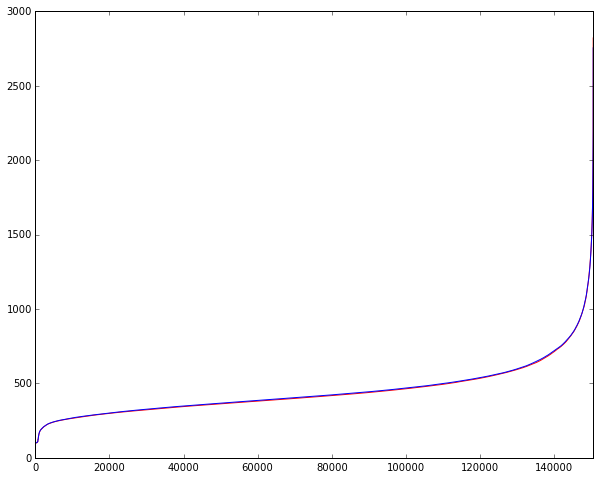

In [153]:
submit31.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit32.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub32 = submit32.describe()
sub32

0.992142026341 7.42818164181


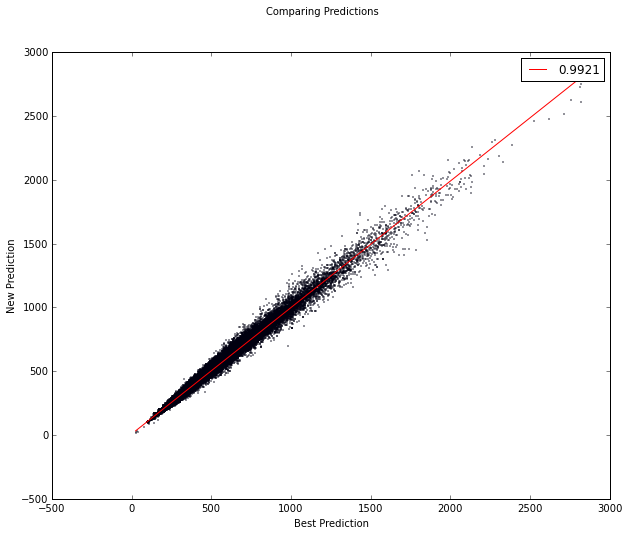

In [154]:
current = list(submit32.REN_BASE_RENT)
best = list(submit31.REN_BASE_RENT)
m, b = np.polyfit(best,current, 1)
x = np.arange(min(best),max(best))
plt.scatter(best, current, marker='.', s=1)
plt.plot(x, m*x + b, 'r-', label='%.4f'%m)
plt.suptitle('Comparing Predictions')
plt.xlabel('Best Prediction')
plt.ylabel('New Prediction')
plt.legend()
print m, b

In [155]:
# submit32.to_csv('submit32.csv', index=False)

# Submit32 0.21476

# TODO

At a high level:
1. better imputation for quantity variables to ensure we capture size -DONE
- average monthly rental per sqm mean per month or year 
- calc average price based on geo comprables 
- every repeated ve_number should get an estimate from it's previous rent - DONE
- calc distance to interesting feature classes 

Today
1. cleanup ren_base_rent - DONE?
- replot price over time - DONE
- plot price for 11 major areas - DONE
- project better last_rent 
- calc median price per zip per bedroom count per year and number of rentals at the time for the area

The list of ideas:
1. better quantity imputation (house_area, bedrooms, effective_bedrooms, etc.)
- average monthly rental per sqm mean per month or year
- number of rentals at the time
- standardize sq footage?
- month as feature
- plot price growth per area looking for different trends
- sql search for near properties on distance, , effective_rooms, bedrooms, toilets, 
- widnsorize ren_base_rent
- keep only sa1_7 as a numeric
- drop sa1_7 and keep the rest ?
- average price over x months (running average)
- provide mean price at every point of hierarchy for trailing 12 months
- are there date dependent jumps in price?
- rental price per ve_number ?
- rate of inflation? should be captured
- distance from population center
- map out commute time ?
- are there rent controlled areas ? look into land_classification
- search near neighbors for only the last year
- cluster on sq footage first
- cluster on a few variables and scale them all the same: normalize with variance 1. z-score . 
- standardize all numerical to 0-1 for SVM
- variables that capture trends and rates of change can create derived features
- create variables that capture rate of change
- review the partial dependency graphs 
- average price per category & number or rentals at that time
- capture density: # of rentals in that area, and mean value
- number of rentals per sa1_7 or higher 
- size of dempgraphics area as a feature (min and max x, y)

In [5]:
pfile = 'south12_AVG_Blender_(19+38)_(76)_100_Univariate_Selections_test12.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit33 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,120.647141
1,12686,100.273766
2,122383,104.059883
3,147691,104.161980
4,152161,103.296295


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,461.253074
std,1526951.230241,187.708737
min,30.000000,18.430538
25%,1315572.500000,352.024124
50%,2638793.000000,420.949097
75%,3964925.250000,517.240616
max,5280763.000000,2599.837646


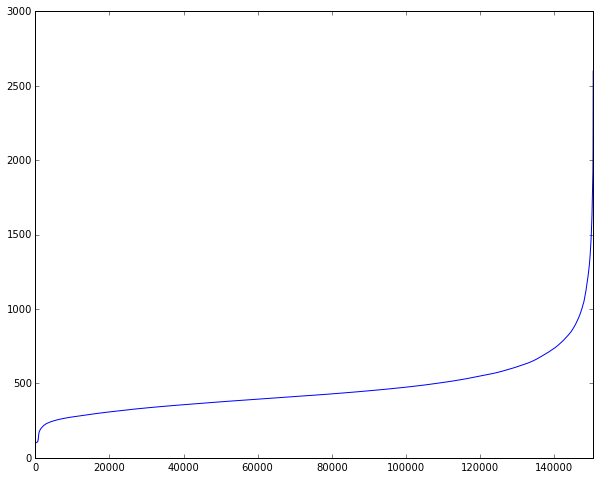

In [6]:
#submit32.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit33.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub33 = submit33.describe()
sub33

1.0160857403 2.74712587903


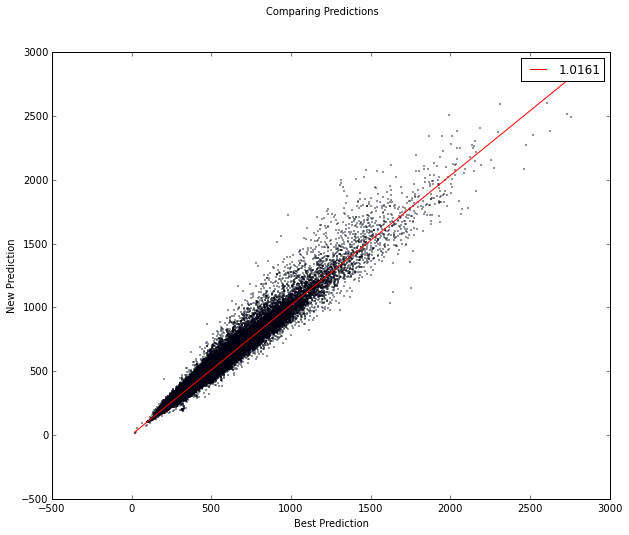

In [158]:
current = list(submit33.REN_BASE_RENT)
best = list(submit32.REN_BASE_RENT)
m, b = np.polyfit(best,current, 1)
x = np.arange(min(best),max(best))
plt.scatter(best, current, marker='.', s=1)
plt.plot(x, m*x + b, 'r-', label='%.4f'%m)
plt.suptitle('Comparing Predictions')
plt.xlabel('Best Prediction')
plt.ylabel('New Prediction')
plt.legend()
print m, b

In [159]:
#submit33.to_csv('submit33.csv', index=False)

# Submit33 0.21158

In [4]:
def compare_plot(best, current):
    best = list(best)
    current = list(current)
    m, b = np.polyfit(best,current, 1)
    x = np.arange(min(best),max(best))
    plt.scatter(best, current, marker='.', s=1)
    plt.plot(x, m*x + b, 'r-', label='%.4f'%m)
    plt.suptitle('Comparing Predictions')
    plt.xlabel('Best Prediction')
    plt.ylabel('New Prediction')
    plt.legend()
    print m, b
    plt.show()
    return

In [6]:
pfile = 'south12_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(38)_100_Univariate_Selections_test12.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit34 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,121.167580
1,12686,101.739624
2,122383,106.693665
3,147691,106.693665
4,152161,103.995628


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,465.342038
std,1526951.230241,189.880050
min,30.000000,7.569185
25%,1315572.500000,354.927406
50%,2638793.000000,424.639893
75%,3964925.250000,522.134796
max,5280763.000000,2890.923096


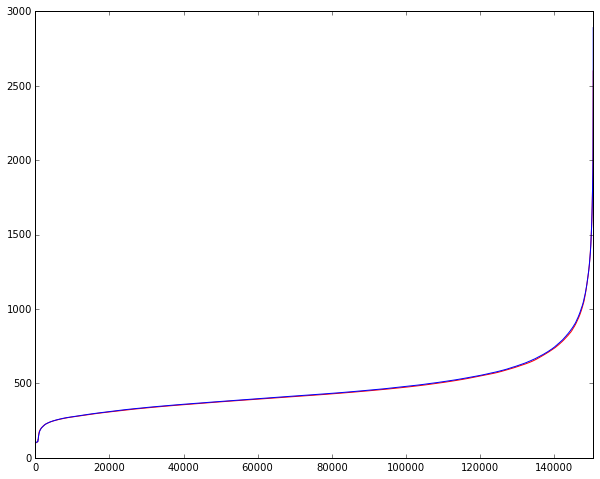

In [7]:
submit33.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit34.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub34 = submit34.describe()
sub34

1.00423038813 2.13768425283


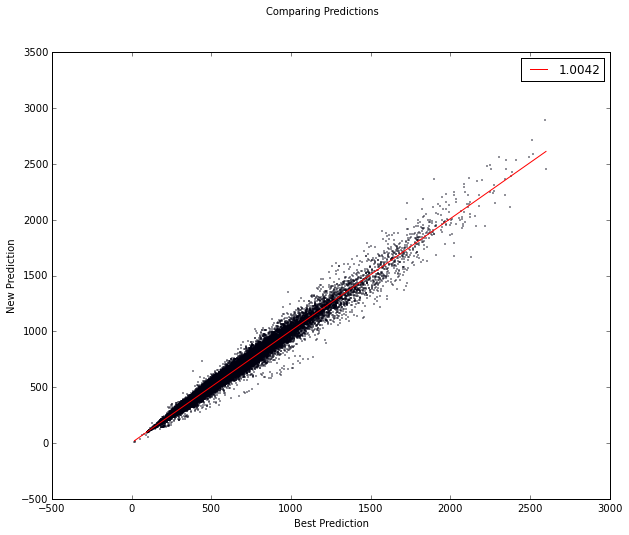

In [9]:
compare_plot(submit33.REN_BASE_RENT, submit34.REN_BASE_RENT)

In [167]:
#submit34.to_csv('submit34.csv', index=False)

# Submit34 0.21695

In [10]:
pfile = 'south12_last_rent_eXtreme_Gradient_Boosted_Trees_Regressor_with_Earl_(35)_100_Univariate_Selections_test12_last_rent.csv.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit35 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,123.507278
1,12686,102.960052
2,122383,104.640701
3,147691,104.640701
4,152161,104.285812


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,468.346247
std,1526951.230241,192.420745
min,30.000000,12.946673
25%,1315572.500000,354.592400
50%,2638793.000000,429.184311
75%,3964925.250000,528.330139
max,5280763.000000,3265.650146


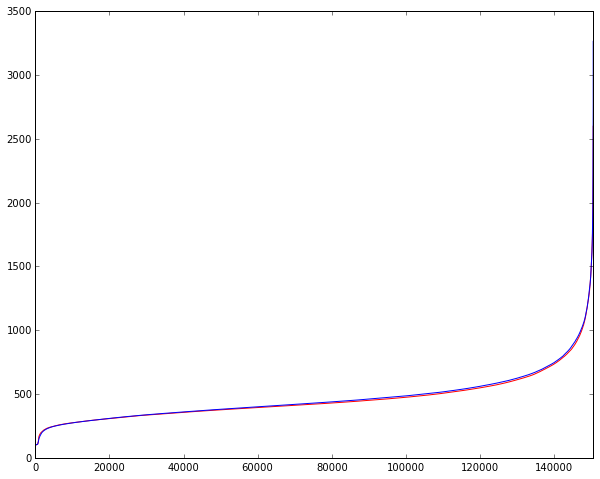

In [11]:
submit33.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit35.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub35 = submit35.describe()
sub35

0.984266921893 14.3501038974


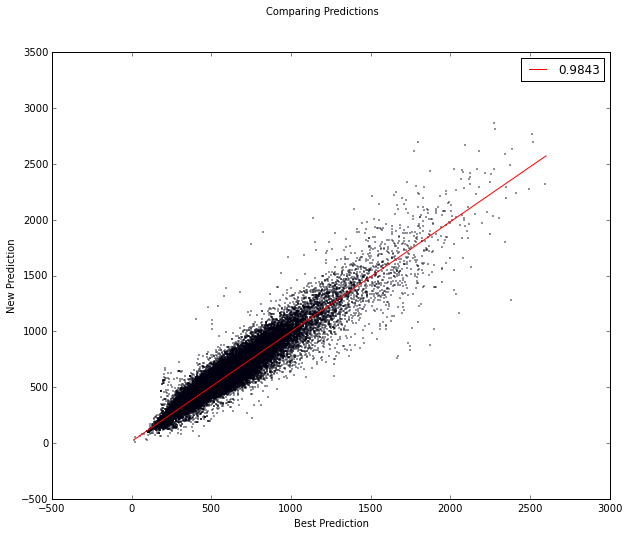

In [12]:
compare_plot(submit33.REN_BASE_RENT, submit35.REN_BASE_RENT)

In [13]:
submit35.to_csv('submit35.csv', index=False)

# Submit35  0.21517

In [5]:
pfile = 'south12_last_rent_AVG_Blender_(16+27+35)_(83)_100_Informative_Features_test12_last_rent.csv.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit36 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,122.634651
1,12686,103.287201
2,122383,104.630775
3,147691,104.681961
4,152161,104.675163


In [6]:
submit33.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit36.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub36 = submit36.describe()
sub36

NameError: name 'submit33' is not defined

0.999099944436 3.67283516885


/Users/paulperry/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


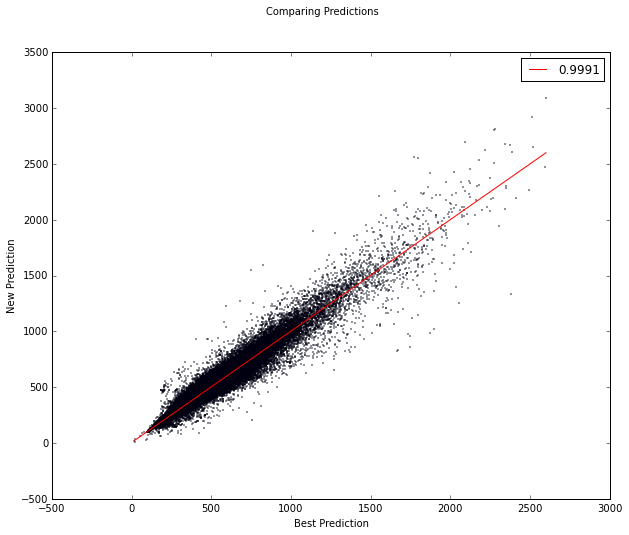

In [11]:
compare_plot(submit33.REN_BASE_RENT, submit36.REN_BASE_RENT)

In [12]:
#submit36.to_csv('submit36.csv', index=False)

In [13]:
sub33

,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,461.253074
std,1526951.230241,187.708737
min,30.000000,18.430538
25%,1315572.500000,352.024124
50%,2638793.000000,420.949097
75%,3964925.250000,517.240616
max,5280763.000000,2599.837646


In [14]:
sub36

,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,464.510756
std,1526951.230241,193.379547
min,30.000000,11.984860
25%,1315572.500000,350.489502
50%,2638793.000000,424.204453
75%,3964925.250000,523.289017
max,5280763.000000,3089.384521


# Submit36 0.21034

In [7]:
pfile = 'south13_145_Advanced_GLM_Blender_(20+22+23+29+30+36+37+38)_(93)_100_Univariate_Selections_test13_145.csv'
predict = pd.read_csv(pfile)
submit = sample_submission.copy()
submit.REN_BASE_RENT = predict.Prediction
submit37 = submit.copy()
submit[:5]

,REN_ID,REN_BASE_RENT
0,10568,109.142330
1,12686,98.086202
2,122383,99.973374
3,147691,99.973374
4,152161,98.725174


,REN_ID,REN_BASE_RENT
count,150508.000000,150508.000000
mean,2640827.444495,460.015686
std,1526951.230241,197.947872
min,30.000000,51.067577
25%,1315572.500000,342.172946
50%,2638793.000000,421.219286
75%,3964925.250000,522.878869
max,5280763.000000,2899.397761


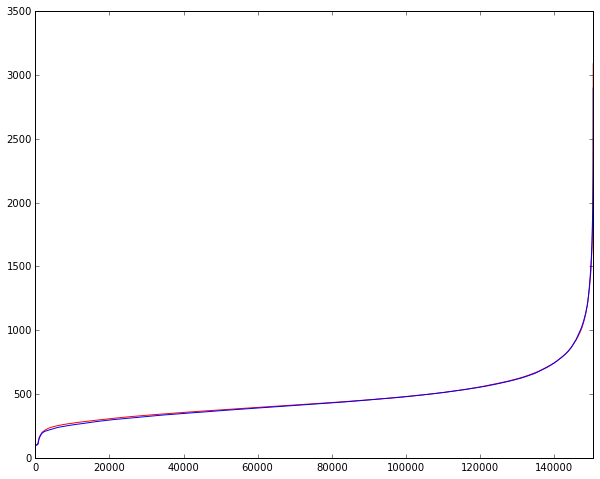

In [8]:
submit36.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False, color='red')
submit37.sort_values(by='REN_BASE_RENT').REN_BASE_RENT.plot(use_index=False)

sub37 = submit37.describe()
sub37

0.988956068682 0.634955447167


/Users/paulperry/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


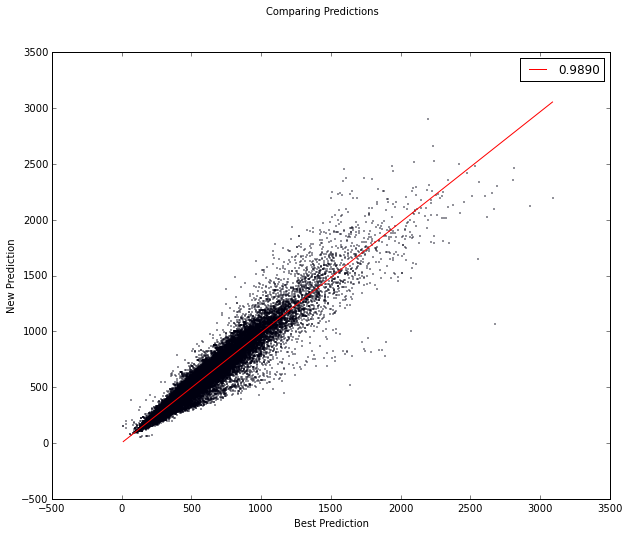

In [9]:
compare_plot(submit36.REN_BASE_RENT, submit37.REN_BASE_RENT)

In [10]:
submit37.to_csv('submit37.csv', index=False)

In [11]:
# Submit37 0.22499